In [38]:
import os

import einops as ei
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn import impute as skl_impute
from sklearn import linear_model as skl_linear_model
from sklearn import metrics as skl_metrics
from sklearn import preprocessing as skl_preprocessing
from tqdm.auto import tqdm

tqdm.pandas(desc='Processing Dataframe')

In [3]:
base_dir = '.'
data_dir = os.path.join(base_dir, 'data')

raw_dir = 'extracted'

oes_dir = 'occupational_employment_and_wage'
csc_dir = 'college_scorecard'
ncei_dir = 'ncei_weather'

years = [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011]

raw_paths = {
    'oes': lambda year: f'oes_{year}_data.csv',
    'csc': lambda year: f'MERGED{year-1}_{str(year)[2:]}_PP.csv',
    'ncei_temperature': lambda year: os.path.join('avg_temperature', f'{year}.csv'),
    'ncei_precipitation': lambda year: os.path.join('precipitation', f'{year}.csv'),
    'ncei_temperature_us': 'us_avg_temperature.csv',
    'ncei_precipitation_us': 'us_precipitation.csv',
}
processed_paths = {
    'oes': 'oes_all.parquet',
    'csc': 'csc_all.parquet',
    'ncei_temperature': 'temperature.parquet',
    'ncei_precipitation': 'precipitation.parquet',
    'merged': 'merged.parquet',
}

# **Milestone 1 - Data Extraction**

In [3]:
to_float = lambda series: pd.to_numeric(series, errors='coerce')
to_str = lambda series: series.astype(str, copy=True)

## **1.1 Data Preprocessing**

### **1.1.1. Occupational Employment and Wage Statistics (OES)**

In [4]:
oes_raw_dfs = {
    year: pd.read_csv(
        os.path.join(data_dir, raw_dir, oes_dir, raw_paths['oes'](year)),
        low_memory=False,
    )
    for year in tqdm(years)
}

print('First few rows of 2023 data:')
display(oes_raw_dfs[2023].head())

print('Dataframe informations:')
for df in oes_raw_dfs.values():
    print('=' * 50)
    display(df.info())

  0%|          | 0/13 [00:00<?, ?it/s]

First few rows of 2023 data:


,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,23.11,37.01,58.4,29050,35660,48060,76980,121470,NaN,NaN
1,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,56.19,81.29,111.36,54550,78330,116880,169090,231620,NaN,NaN
2,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,49.74,79.57,#,46400,66170,103460,165500,#,NaN,NaN
3,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,99.37,#,#,80000,130840,206680,#,#,NaN,NaN
4,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,99.37,#,#,80000,130840,206680,#,#,NaN,NaN


Dataframe informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413327 entries, 0 to 413326
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA          413327 non-null  int64 
 1   AREA_TITLE    413327 non-null  object
 2   AREA_TYPE     413327 non-null  int64 
 3   PRIM_STATE    413327 non-null  object
 4   NAICS         413327 non-null  object
 5   NAICS_TITLE   413327 non-null  object
 6   I_GROUP       413327 non-null  object
 7   OWN_CODE      413327 non-null  int64 
 8   OCC_CODE      413327 non-null  object
 9   OCC_TITLE     413327 non-null  object
 10  O_GROUP       413327 non-null  object
 11  TOT_EMP       413327 non-null  object
 12  EMP_PRSE      413327 non-null  object
 13  JOBS_1000     235826 non-null  object
 14  LOC_QUOTIENT  235826 non-null  object
 15  PCT_TOTAL     170470 non-null  object
 16  PCT_RPT       170470 non-null  object
 17  H_MEAN        413327 non-null  object
 18  

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409859 entries, 0 to 409858
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA          409859 non-null  int64 
 1   AREA_TITLE    409859 non-null  object
 2   AREA_TYPE     409859 non-null  int64 
 3   PRIM_STATE    409859 non-null  object
 4   NAICS         409859 non-null  object
 5   NAICS_TITLE   409859 non-null  object
 6   I_GROUP       409859 non-null  object
 7   OWN_CODE      409859 non-null  int64 
 8   OCC_CODE      409859 non-null  object
 9   OCC_TITLE     409859 non-null  object
 10  O_GROUP       409859 non-null  object
 11  TOT_EMP       409859 non-null  object
 12  EMP_PRSE      409859 non-null  object
 13  JOBS_1000     234012 non-null  object
 14  LOC_QUOTIENT  234012 non-null  object
 15  PCT_TOTAL     168772 non-null  object
 16  PCT_RPT       168772 non-null  object
 17  H_MEAN        409859 non-null  object
 18  A_MEAN        409859 non

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406359 entries, 0 to 406358
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA          406359 non-null  int64 
 1   AREA_TITLE    406359 non-null  object
 2   AREA_TYPE     406359 non-null  int64 
 3   PRIM_STATE    406359 non-null  object
 4   NAICS         406359 non-null  object
 5   NAICS_TITLE   406359 non-null  object
 6   I_GROUP       406359 non-null  object
 7   OWN_CODE      406359 non-null  int64 
 8   OCC_CODE      406359 non-null  object
 9   OCC_TITLE     406359 non-null  object
 10  O_GROUP       406359 non-null  object
 11  TOT_EMP       406359 non-null  object
 12  EMP_PRSE      406359 non-null  object
 13  JOBS_1000     232664 non-null  object
 14  LOC_QUOTIENT  232664 non-null  object
 15  PCT_TOTAL     166622 non-null  object
 16  PCT_RPT       166622 non-null  object
 17  H_MEAN        406359 non-null  object
 18  A_MEAN        406359 non

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390705 entries, 0 to 390704
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   AREA          390705 non-null  int64 
 1   AREA_TITLE    390705 non-null  object
 2   AREA_TYPE     390705 non-null  int64 
 3   PRIM_STATE    390705 non-null  object
 4   NAICS         390705 non-null  object
 5   NAICS_TITLE   390705 non-null  object
 6   I_GROUP       390705 non-null  object
 7   OWN_CODE      390705 non-null  int64 
 8   OCC_CODE      390705 non-null  object
 9   OCC_TITLE     390705 non-null  object
 10  O_GROUP       390705 non-null  object
 11  TOT_EMP       390705 non-null  object
 12  EMP_PRSE      390705 non-null  object
 13  JOBS_1000     221444 non-null  object
 14  LOC_QUOTIENT  221444 non-null  object
 15  PCT_TOTAL     162652 non-null  object
 16  H_MEAN        390705 non-null  object
 17  A_MEAN        390705 non-null  object
 18  MEAN_PRSE     390705 non

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395647 entries, 0 to 395646
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   area            395647 non-null  int64  
 1   area_title      395647 non-null  object 
 2   area_type       395647 non-null  int64  
 3   naics           395647 non-null  object 
 4   naics_title     395647 non-null  object 
 5   i_group         395647 non-null  object 
 6   own_code        395647 non-null  int64  
 7   occ_code        395647 non-null  object 
 8   occ_title       395647 non-null  object 
 9   o_group         395647 non-null  object 
 10  tot_emp         395647 non-null  object 
 11  emp_prse        395647 non-null  object 
 12  jobs_1000_orig  225176 non-null  object 
 13  loc_quotient    207966 non-null  float64
 14  pct_total       165003 non-null  object 
 15  h_mean          395647 non-null  object 
 16  a_mean          395647 non-null  object 
 17  mean_prse 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403895 entries, 0 to 403894
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   area          403895 non-null  int64 
 1   area_title    403895 non-null  object
 2   area_type     403895 non-null  int64 
 3   naics         403895 non-null  object
 4   naics_title   403895 non-null  object
 5   i_group       403895 non-null  object
 6   own_code      403895 non-null  int64 
 7   occ_code      403895 non-null  object
 8   occ_title     403895 non-null  object
 9   o_group       403895 non-null  object
 10  tot_emp       403895 non-null  object
 11  emp_prse      403895 non-null  object
 12  jobs_1000     227944 non-null  object
 13  loc_quotient  227944 non-null  object
 14  pct_total     169080 non-null  object
 15  h_mean        403895 non-null  object
 16  a_mean        403895 non-null  object
 17  mean_prse     403895 non-null  object
 18  h_pct10       403895 non

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427266 entries, 0 to 427265
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   area          427266 non-null  int64  
 1   area_title    427266 non-null  object 
 2   area_type     427266 non-null  int64  
 3   naics         427266 non-null  object 
 4   naics_title   427266 non-null  object 
 5   i_group       427266 non-null  object 
 6   own_code      427266 non-null  int64  
 7   occ_code      427266 non-null  object 
 8   occ_title     427266 non-null  object 
 9   o_group       427266 non-null  object 
 10  tot_emp       427266 non-null  object 
 11  emp_prse      427266 non-null  object 
 12  jobs_1000     252871 non-null  object 
 13  loc_quotient  252871 non-null  object 
 14  pct_total     167504 non-null  object 
 15  h_mean        427266 non-null  object 
 16  a_mean        427266 non-null  object 
 17  mean_prse     427266 non-null  object 
 18  h_pc

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440879 entries, 0 to 440878
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   area          440879 non-null  int64  
 1   area_title    440879 non-null  object 
 2   area_type     440879 non-null  int64  
 3   naics         440879 non-null  object 
 4   naics_title   440879 non-null  object 
 5   own_code      439725 non-null  float64
 6   occ code      440879 non-null  object 
 7   occ title     440879 non-null  object 
 8   group         440879 non-null  object 
 9   tot_emp       440879 non-null  object 
 10  emp_prse      440879 non-null  object 
 11  jobs_1000     256320 non-null  object 
 12  loc_quotient  256320 non-null  object 
 13  pct_total     177614 non-null  object 
 14  h_mean        440879 non-null  object 
 15  a_mean        440879 non-null  object 
 16  mean_prse     440879 non-null  object 
 17  h_pct10       440879 non-null  object 
 18  h_pc

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439942 entries, 0 to 439941
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   area          439942 non-null  int64  
 1   area_title    439942 non-null  object 
 2   area_type     439942 non-null  int64  
 3   naics         439942 non-null  object 
 4   naics_title   439942 non-null  object 
 5   own_code      439942 non-null  int64  
 6   occ code      439942 non-null  object 
 7   occ title     439942 non-null  object 
 8   group         439942 non-null  object 
 9   tot_emp       439942 non-null  object 
 10  emp_prse      439942 non-null  object 
 11  jobs_1000     256598 non-null  object 
 12  loc_quotient  256598 non-null  object 
 13  pct_total     176427 non-null  object 
 14  h_mean        439942 non-null  object 
 15  a_mean        439942 non-null  object 
 16  mean_prse     439942 non-null  object 
 17  h_pct10       439942 non-null  object 
 18  h_pc

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435006 entries, 0 to 435005
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   area          435005 non-null  float64
 1   area_title    435005 non-null  object 
 2   area_type     435005 non-null  float64
 3   naics         435005 non-null  object 
 4   naics_title   435005 non-null  object 
 5   own_code      435005 non-null  float64
 6   occ code      435005 non-null  object 
 7   occ title     435005 non-null  object 
 8   group         435005 non-null  object 
 9   tot_emp       435005 non-null  object 
 10  emp_prse      435005 non-null  object 
 11  jobs_1000     255167 non-null  object 
 12  loc_quotient  255167 non-null  object 
 13  pct_total     172899 non-null  object 
 14  h_mean        435005 non-null  object 
 15  a_mean        435005 non-null  object 
 16  mean_prse     435005 non-null  object 
 17  h_pct10       435005 non-null  object 
 18  h_pc

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434473 entries, 0 to 434472
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   area          434473 non-null  int64 
 1   area_title    434473 non-null  object
 2   area_type     434473 non-null  int64 
 3   naics         434473 non-null  object
 4   naics_title   434473 non-null  object
 5   own_code      434473 non-null  int64 
 6   occ_code      434473 non-null  object
 7   occ_title     434473 non-null  object
 8   group         434473 non-null  object
 9   tot_emp       434473 non-null  object
 10  emp_prse      434473 non-null  object
 11  jobs_1000     255343 non-null  object
 12  loc_quotient  255343 non-null  object
 13  pct_total     172172 non-null  object
 14  h_mean        434473 non-null  object
 15  a_mean        434473 non-null  object
 16  mean_prse     434473 non-null  object
 17  h_pct10       434473 non-null  object
 18  h_pct25       434473 non

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432500 entries, 0 to 432499
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   area          432500 non-null  int64 
 1   area_title    432500 non-null  object
 2   area_type     432500 non-null  int64 
 3   naics         432500 non-null  object
 4   naics_title   432262 non-null  object
 5   own_code      432500 non-null  int64 
 6   occ_code      432500 non-null  object
 7   occ_title     432500 non-null  object
 8   group         432500 non-null  object
 9   tot_emp       432500 non-null  object
 10  emp_prse      432500 non-null  object
 11  jobs_1000     254168 non-null  object
 12  loc_quotient  254168 non-null  object
 13  pct_tot       171410 non-null  object
 14  h_mean        432500 non-null  object
 15  a_mean        432500 non-null  object
 16  mean_prse     432500 non-null  object
 17  h_pct10       432500 non-null  object
 18  h_pct25       432500 non

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338570 entries, 0 to 338569
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   AREA         338570 non-null  int64  
 1   AREA_TITLE   338570 non-null  object 
 2   AREA_TYPE    338570 non-null  int64  
 3   NAICS        338570 non-null  object 
 4   NAICS_TITLE  338458 non-null  object 
 5   OWN_CODE     338570 non-null  int64  
 6   OCC_CODE     338570 non-null  object 
 7   OCC_TITLE    338570 non-null  object 
 8   GROUP        23245 non-null   object 
 9   TOT_EMP      338570 non-null  object 
 10  EMP_PRSE     338570 non-null  object 
 11  JOBS_1000    248591 non-null  object 
 12  LOC_Q        248591 non-null  object 
 13  PCT_TOT      86117 non-null   object 
 14  H_MEAN       338570 non-null  object 
 15  A_MEAN       338570 non-null  object 
 16  MEAN_PRSE    338570 non-null  object 
 17  H_PCT10      338570 non-null  object 
 18  H_PCT25      338570 non-

None

In [5]:
for df in oes_raw_dfs.values():
    print(list(df.columns))

['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE', 'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'ANNUAL', 'HOURLY']
['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE', 'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'ANNUAL', 'HOURLY']
['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE', 'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP', 'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10',

In [6]:
# Some column names are lowercase or have spaces in the middle
for df in oes_raw_dfs.values():
    df.rename(
        columns={column: column.strip().upper().replace(' ', '_') for column in df.columns},
        inplace=True,
    )

# Rename some columns
for df in oes_raw_dfs.values():
    columns = list(df.columns)
    if 'PCT_TOT' in columns:
        df.rename(columns={'PCT_TOT': 'PCT_TOTAL'}, inplace=True)
    if 'LOC_Q' in columns:
        df.rename(columns={'LOC_Q': 'LOC_QUOTIENT'}, inplace=True)
    if 'JOBS_1000_ORIG' in columns:
        df.rename(columns={'JOBS_1000_ORIG': 'JOBS_1000'}, inplace=True)

    # We don't convert GROUP to O_GROUP since GROUP has lots of missing data

# Set up common columns
oes_common_columns = set(oes_raw_dfs[2023].columns)
for year, df in oes_raw_dfs.items():
    if year != 2023:
        oes_common_columns.intersection_update(df.columns)

oes_uncommon_columns = set(column for df in oes_raw_dfs.values() for column in df.columns) - oes_common_columns

print('Number of common columns:', len(oes_common_columns))
display(oes_common_columns)

print('Number of non-common columns:', len(oes_uncommon_columns))
display(oes_uncommon_columns)

Number of common columns: 28


{'ANNUAL',
 'AREA',
 'AREA_TITLE',
 'AREA_TYPE',
 'A_MEAN',
 'A_MEDIAN',
 'A_PCT10',
 'A_PCT25',
 'A_PCT75',
 'A_PCT90',
 'EMP_PRSE',
 'HOURLY',
 'H_MEAN',
 'H_MEDIAN',
 'H_PCT10',
 'H_PCT25',
 'H_PCT75',
 'H_PCT90',
 'JOBS_1000',
 'LOC_QUOTIENT',
 'MEAN_PRSE',
 'NAICS',
 'NAICS_TITLE',
 'OCC_CODE',
 'OCC_TITLE',
 'OWN_CODE',
 'PCT_TOTAL',
 'TOT_EMP'}

Number of non-common columns: 6


{'GROUP', 'I_GROUP', 'O_GROUP', 'PCT_RPT', 'PRIM_STATE', 'UNNAMED:_29'}

In [7]:
# Convert columns to appropriate types
oes_column_cast_fns = {
    'ANNUAL': to_float,  # bool, but bool cannot have NaN
    'AREA': to_str,
    'AREA_TITLE': to_str,
    'AREA_TYPE': to_str,
    'A_MEAN': to_float,
    'A_MEDIAN': to_float,
    'A_PCT10': to_float,
    'A_PCT25': to_float,
    'A_PCT75': to_float,
    'A_PCT90': to_float,
    'EMP_PRSE': to_float,
    'HOURLY': to_float,  # bool, but bool cannot have NaN
    'H_MEAN': to_float,
    'H_MEDIAN': to_float,
    'H_PCT10': to_float,
    'H_PCT25': to_float,
    'H_PCT75': to_float,
    'H_PCT90': to_float,
    'JOBS_1000': to_float,
    'LOC_QUOTIENT': to_float,
    'MEAN_PRSE': to_float,
    'NAICS': to_str,
    'NAICS_TITLE': to_str,
    'OWN_CODE': to_str,
    'OCC_CODE': to_str,
    'OCC_TITLE': to_str,
    'PCT_TOTAL': to_float,
    'TOT_EMP': to_float,  # int, but int cannot have NaN
}

oes_renamed_columns = {
    'ANNUAL': 'only_annual_wage',
    'AREA': 'area_code',
    'AREA_TITLE': 'area_title',
    'AREA_TYPE': 'area_type',
    'A_MEAN': 'annual_wage_mean',
    'A_MEDIAN': 'annual_wage_median',
    'A_PCT10': 'annual_wage_10th_percentile',
    'A_PCT25': 'annual_wage_25th_percentile',
    'A_PCT75': 'annual_wage_75th_percentile',
    'A_PCT90': 'annual_wage_90th_percentile',
    'EMP_PRSE': 'employment_estimate_prse',
    'HOURLY': 'only_hourly_wage',
    'H_MEAN': 'hourly_wage_mean',
    'H_MEDIAN': 'hourly_wage_mean',
    'H_PCT10': 'hourly_wage_10th_percentile',
    'H_PCT25': 'hourly_wage_25th_percentile',
    'H_PCT75': 'hourly_wage_75th_percentile',
    'H_PCT90': 'hourly_wage_90th_percentile',
    'JOBS_1000': 'jobs_per_1000',
    'LOC_QUOTIENT': 'location_quotent',
    'MEAN_PRSE': 'wage_mean_prse',
    'NAICS': 'industry_naics_code',
    'NAICS_TITLE': 'industry_naics_title',
    'OWN_CODE': 'ownership_code',
    'OCC_CODE': 'occupation_soc_code',
    'OCC_TITLE': 'occupation_soc_title',
    'PCT_TOTAL': 'percentage_total',
    'TOT_EMP': 'total_employment',
}

# Sanity check
assert len(oes_column_cast_fns) == len(oes_common_columns)
for column in oes_column_cast_fns.keys():
    assert column in oes_common_columns

oes_processed_dfs = {
    year: pd.DataFrame(
        {oes_renamed_columns[column]: cast_fn(df[column]) for column, cast_fn in oes_column_cast_fns.items()}
    )
    for year, df in tqdm(oes_raw_dfs.items())
}
for year, df in tqdm(oes_processed_dfs.items()):
    df['year'] = year

print('First few rows of 2023 data:')
display(oes_processed_dfs[2023].head())

print('Dataframe Infos:')
for df in oes_processed_dfs.values():
    print('=' * 50)
    display(df.info())

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

First few rows of 2023 data:


,only_annual_wage,area_code,area_title,area_type,annual_wage_mean,annual_wage_median,annual_wage_10th_percentile,annual_wage_25th_percentile,annual_wage_75th_percentile,annual_wage_90th_percentile,...,location_quotent,wage_mean_prse,industry_naics_code,industry_naics_title,ownership_code,occupation_soc_code,occupation_soc_title,percentage_total,total_employment,year
0,NaN,99,U.S.,1,65470.0,48060.0,29050.0,35660.0,76980.0,121470.0,...,NaN,0.3,000000,Cross-industry,1235,00-0000,All Occupations,NaN,151853870.0,2023
1,NaN,99,U.S.,1,137750.0,116880.0,54550.0,78330.0,169090.0,231620.0,...,NaN,0.5,000000,Cross-industry,1235,11-0000,Management Occupations,NaN,10495770.0,2023
2,NaN,99,U.S.,1,136100.0,103460.0,46400.0,66170.0,165500.0,NaN,...,NaN,0.9,000000,Cross-industry,1235,11-1000,Top Executives,NaN,3751510.0,2023
3,NaN,99,U.S.,1,258900.0,206680.0,80000.0,130840.0,NaN,NaN,...,NaN,0.7,000000,Cross-industry,1235,11-1010,Chief Executives,NaN,211230.0,2023
4,NaN,99,U.S.,1,258900.0,206680.0,80000.0,130840.0,NaN,NaN,...,NaN,0.7,000000,Cross-industry,1235,11-1011,Chief Executives,NaN,211230.0,2023


Dataframe Infos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413327 entries, 0 to 413326
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   only_annual_wage             16497 non-null   float64
 1   area_code                    413327 non-null  object 
 2   area_title                   413327 non-null  object 
 3   area_type                    413327 non-null  object 
 4   annual_wage_mean             407975 non-null  float64
 5   annual_wage_median           405853 non-null  float64
 6   annual_wage_10th_percentile  407974 non-null  float64
 7   annual_wage_25th_percentile  407512 non-null  float64
 8   annual_wage_75th_percentile  402721 non-null  float64
 9   annual_wage_90th_percentile  395483 non-null  float64
 10  employment_estimate_prse     401729 non-null  float64
 11  only_hourly_wage             755 non-null     float64
 12  hourly_wage_mean             390268 non-n

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409859 entries, 0 to 409858
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   only_annual_wage             16052 non-null   float64
 1   area_code                    409859 non-null  object 
 2   area_title                   409859 non-null  object 
 3   area_type                    409859 non-null  object 
 4   annual_wage_mean             404126 non-null  float64
 5   annual_wage_median           402655 non-null  float64
 6   annual_wage_10th_percentile  404340 non-null  float64
 7   annual_wage_25th_percentile  403949 non-null  float64
 8   annual_wage_75th_percentile  399863 non-null  float64
 9   annual_wage_90th_percentile  393656 non-null  float64
 10  employment_estimate_prse     398358 non-null  float64
 11  only_hourly_wage             725 non-null     float64
 12  hourly_wage_mean             387486 non-null  float64
 13 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406359 entries, 0 to 406358
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   only_annual_wage             16027 non-null   float64
 1   area_code                    406359 non-null  object 
 2   area_title                   406359 non-null  object 
 3   area_type                    406359 non-null  object 
 4   annual_wage_mean             402479 non-null  float64
 5   annual_wage_median           399589 non-null  float64
 6   annual_wage_10th_percentile  402475 non-null  float64
 7   annual_wage_25th_percentile  401708 non-null  float64
 8   annual_wage_75th_percentile  395770 non-null  float64
 9   annual_wage_90th_percentile  386099 non-null  float64
 10  employment_estimate_prse     391300 non-null  float64
 11  only_hourly_wage             636 non-null     float64
 12  hourly_wage_mean             384455 non-null  float64
 13 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390705 entries, 0 to 390704
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   only_annual_wage             15420 non-null   float64
 1   area_code                    390705 non-null  object 
 2   area_title                   390705 non-null  object 
 3   area_type                    390705 non-null  object 
 4   annual_wage_mean             383236 non-null  float64
 5   annual_wage_median           381295 non-null  float64
 6   annual_wage_10th_percentile  383212 non-null  float64
 7   annual_wage_25th_percentile  382775 non-null  float64
 8   annual_wage_75th_percentile  378204 non-null  float64
 9   annual_wage_90th_percentile  368678 non-null  float64
 10  employment_estimate_prse     363442 non-null  float64
 11  only_hourly_wage             727 non-null     float64
 12  hourly_wage_mean             367468 non-null  float64
 13 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395647 entries, 0 to 395646
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   only_annual_wage             15709 non-null   float64
 1   area_code                    395647 non-null  object 
 2   area_title                   395647 non-null  object 
 3   area_type                    395647 non-null  object 
 4   annual_wage_mean             388243 non-null  float64
 5   annual_wage_median           386416 non-null  float64
 6   annual_wage_10th_percentile  388239 non-null  float64
 7   annual_wage_25th_percentile  387832 non-null  float64
 8   annual_wage_75th_percentile  383501 non-null  float64
 9   annual_wage_90th_percentile  375009 non-null  float64
 10  employment_estimate_prse     368627 non-null  float64
 11  only_hourly_wage             741 non-null     float64
 12  hourly_wage_mean             372220 non-null  float64
 13 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403895 entries, 0 to 403894
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   only_annual_wage             15682 non-null   float64
 1   area_code                    403895 non-null  object 
 2   area_title                   403895 non-null  object 
 3   area_type                    403895 non-null  object 
 4   annual_wage_mean             396782 non-null  float64
 5   annual_wage_median           395040 non-null  float64
 6   annual_wage_10th_percentile  396782 non-null  float64
 7   annual_wage_25th_percentile  396436 non-null  float64
 8   annual_wage_75th_percentile  392299 non-null  float64
 9   annual_wage_90th_percentile  384085 non-null  float64
 10  employment_estimate_prse     374496 non-null  float64
 11  only_hourly_wage             729 non-null     float64
 12  hourly_wage_mean             380811 non-null  float64
 13 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427266 entries, 0 to 427265
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   only_annual_wage             17050 non-null   float64
 1   area_code                    427266 non-null  object 
 2   area_title                   427266 non-null  object 
 3   area_type                    427266 non-null  object 
 4   annual_wage_mean             419656 non-null  float64
 5   annual_wage_median           417770 non-null  float64
 6   annual_wage_10th_percentile  419656 non-null  float64
 7   annual_wage_25th_percentile  419233 non-null  float64
 8   annual_wage_75th_percentile  414823 non-null  float64
 9   annual_wage_90th_percentile  406469 non-null  float64
 10  employment_estimate_prse     398572 non-null  float64
 11  only_hourly_wage             765 non-null     float64
 12  hourly_wage_mean             402306 non-null  float64
 13 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440879 entries, 0 to 440878
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   only_annual_wage             17322 non-null   float64
 1   area_code                    440879 non-null  object 
 2   area_title                   440879 non-null  object 
 3   area_type                    440879 non-null  object 
 4   annual_wage_mean             433684 non-null  float64
 5   annual_wage_median           431901 non-null  float64
 6   annual_wage_10th_percentile  433679 non-null  float64
 7   annual_wage_25th_percentile  433298 non-null  float64
 8   annual_wage_75th_percentile  428929 non-null  float64
 9   annual_wage_90th_percentile  420560 non-null  float64
 10  employment_estimate_prse     411735 non-null  float64
 11  only_hourly_wage             773 non-null     float64
 12  hourly_wage_mean             415970 non-null  float64
 13 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439942 entries, 0 to 439941
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   only_annual_wage             17585 non-null   float64
 1   area_code                    439942 non-null  object 
 2   area_title                   439942 non-null  object 
 3   area_type                    439942 non-null  object 
 4   annual_wage_mean             432952 non-null  float64
 5   annual_wage_median           430410 non-null  float64
 6   annual_wage_10th_percentile  432887 non-null  float64
 7   annual_wage_25th_percentile  432329 non-null  float64
 8   annual_wage_75th_percentile  426580 non-null  float64
 9   annual_wage_90th_percentile  415447 non-null  float64
 10  employment_estimate_prse     409852 non-null  float64
 11  only_hourly_wage             773 non-null     float64
 12  hourly_wage_mean             414223 non-null  float64
 13 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435006 entries, 0 to 435005
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   only_annual_wage             16984 non-null   float64
 1   area_code                    435006 non-null  object 
 2   area_title                   435006 non-null  object 
 3   area_type                    435006 non-null  object 
 4   annual_wage_mean             428469 non-null  float64
 5   annual_wage_median           426201 non-null  float64
 6   annual_wage_10th_percentile  428436 non-null  float64
 7   annual_wage_25th_percentile  427905 non-null  float64
 8   annual_wage_75th_percentile  422475 non-null  float64
 9   annual_wage_90th_percentile  412320 non-null  float64
 10  employment_estimate_prse     407141 non-null  float64
 11  only_hourly_wage             794 non-null     float64
 12  hourly_wage_mean             409908 non-null  float64
 13 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434473 entries, 0 to 434472
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   only_annual_wage             17579 non-null   float64
 1   area_code                    434473 non-null  object 
 2   area_title                   434473 non-null  object 
 3   area_type                    434473 non-null  object 
 4   annual_wage_mean             428776 non-null  float64
 5   annual_wage_median           426640 non-null  float64
 6   annual_wage_10th_percentile  428775 non-null  float64
 7   annual_wage_25th_percentile  428290 non-null  float64
 8   annual_wage_75th_percentile  423242 non-null  float64
 9   annual_wage_90th_percentile  414088 non-null  float64
 10  employment_estimate_prse     407310 non-null  float64
 11  only_hourly_wage             805 non-null     float64
 12  hourly_wage_mean             410411 non-null  float64
 13 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432500 entries, 0 to 432499
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   only_annual_wage             17193 non-null   float64
 1   area_code                    432500 non-null  object 
 2   area_title                   432500 non-null  object 
 3   area_type                    432500 non-null  object 
 4   annual_wage_mean             427148 non-null  float64
 5   annual_wage_median           425232 non-null  float64
 6   annual_wage_10th_percentile  427145 non-null  float64
 7   annual_wage_25th_percentile  426729 non-null  float64
 8   annual_wage_75th_percentile  422007 non-null  float64
 9   annual_wage_90th_percentile  413633 non-null  float64
 10  employment_estimate_prse     406446 non-null  float64
 11  only_hourly_wage             795 non-null     float64
 12  hourly_wage_mean             409399 non-null  float64
 13 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338570 entries, 0 to 338569
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   only_annual_wage             15354 non-null   float64
 1   area_code                    338570 non-null  object 
 2   area_title                   338570 non-null  object 
 3   area_type                    338570 non-null  object 
 4   annual_wage_mean             334056 non-null  float64
 5   annual_wage_median           332432 non-null  float64
 6   annual_wage_10th_percentile  334053 non-null  float64
 7   annual_wage_25th_percentile  333641 non-null  float64
 8   annual_wage_75th_percentile  330204 non-null  float64
 9   annual_wage_90th_percentile  324934 non-null  float64
 10  employment_estimate_prse     315901 non-null  float64
 11  only_hourly_wage             0 non-null       float64
 12  hourly_wage_mean             318223 non-null  float64
 13 

None

In [ ]:
# Merge and save one big dataframe
oes_all_df = pd.concat(oes_processed_dfs.values(), ignore_index=True)
oes_all_df.to_parquet(os.path.join(data_dir, processed_paths['oes']))
oes_all_df

,only_annual_wage,area_code,area_title,area_type,annual_wage_mean,annual_wage_median,annual_wage_10th_percentile,annual_wage_25th_percentile,annual_wage_75th_percentile,annual_wage_90th_percentile,...,location_quotent,wage_mean_prse,industry_naics_code,industry_naics_title,ownership_code,occupation_soc_code,occupation_soc_title,percentage_total,total_employment,year
0,NaN,99,U.S.,1,65470.0,48060.0,29050.0,35660.0,76980.0,121470.0,...,NaN,0.3,000000,Cross-industry,1235,00-0000,All Occupations,NaN,151853870.0,2023
1,NaN,99,U.S.,1,137750.0,116880.0,54550.0,78330.0,169090.0,231620.0,...,NaN,0.5,000000,Cross-industry,1235,11-0000,Management Occupations,NaN,10495770.0,2023
2,NaN,99,U.S.,1,136100.0,103460.0,46400.0,66170.0,165500.0,NaN,...,NaN,0.9,000000,Cross-industry,1235,11-1000,Top Executives,NaN,3751510.0,2023
3,NaN,99,U.S.,1,258900.0,206680.0,80000.0,130840.0,NaN,NaN,...,NaN,0.7,000000,Cross-industry,1235,11-1010,Chief Executives,NaN,211230.0,2023
4,NaN,99,U.S.,1,258900.0,206680.0,80000.0,130840.0,NaN,NaN,...,NaN,0.7,000000,Cross-industry,1235,11-1011,Chief Executives,NaN,211230.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5368423,NaN,7200002,Puerto Rico nonmetropolitan area 2,6,18400.0,17770.0,15830.0,16560.0,18990.0,21190.0,...,0.63,2.0,000000,Cross-industry,1235,53-0000,Transportation and Material Moving Occupations,NaN,480.0,2011
5368424,NaN,7200002,Puerto Rico nonmetropolitan area 2,6,17640.0,17790.0,15850.0,16570.0,19010.0,20010.0,...,0.82,2.3,000000,Cross-industry,1235,53-3032,Heavy and Tractor-Trailer Truck Drivers,NaN,110.0,2011
5368425,NaN,7200002,Puerto Rico nonmetropolitan area 2,6,17390.0,17550.0,15760.0,16430.0,18670.0,19390.0,...,0.90,3.0,000000,Cross-industry,1235,53-3033,Light Truck or Delivery Services Drivers,NaN,60.0,2011
5368426,NaN,7200002,Puerto Rico nonmetropolitan area 2,6,17600.0,17620.0,15780.0,16470.0,18770.0,19530.0,...,1.58,3.0,000000,Cross-industry,1235,53-7051,Industrial Truck and Tractor Operators,NaN,70.0,2011


### **1.1.2 College Scorecard (CSC)**

In [22]:
csc_raw_dfs = {
    year: pd.read_csv(
        os.path.join(data_dir, raw_dir, csc_dir, raw_paths['csc'](year)),
        low_memory=False,
    )
    for year in tqdm(years, desc='Loading CSV files')
}

# Sanity check
csc_raw_dfs[2023].head()

Loading CSV files:   0%|          | 0/13 [00:00<?, ?it/s]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE0_P11,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Define useful columns to keep
csc_useful_columns = [
    'ST_FIPS',  # FIPS code, to match state with OES data
    'D150_4',  # Completion count
    'D150_L4',  # Completion count
]
csc_pcip_columns = []  # Percentage of each CIP code
for column in csc_raw_dfs[2023].columns:
    if column.startswith('PCIP'):
        csc_pcip_columns.append(column)

csc_useful_columns += csc_pcip_columns

display(csc_useful_columns)

['ST_FIPS',
 'D150_4',
 'D150_L4',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'PCIP54']

In [24]:
csc_column_cast_fns = {
    'ST_FIPS': to_str,
    'D150_4': to_float,
    'D150_L4': to_float,
    **{col: to_float for col in csc_pcip_columns},
}

csc_processed_dfs = {
    year: pd.DataFrame({column: cast_fn(df[column]) for column, cast_fn in csc_column_cast_fns.items()})
    for year, df in tqdm(csc_raw_dfs.items(), desc='Processing dataframes')
}

for df in csc_processed_dfs.values():
    # one of two values is NaN, so we would only need 1
    df['COUNT'] = df[['D150_4', 'D150_L4']].sum(axis=1, skipna=True)

# Convert from percentage to the number of degrees
csc_cip_columns = [col.removeprefix('P') for col in csc_pcip_columns]
for df in csc_processed_dfs.values():
    for cip_col, pcip_col in zip(csc_cip_columns, csc_pcip_columns):
        df[cip_col] = df[pcip_col] * df['COUNT']

# We drop the initial columns since they are not needed anymore
for df in csc_processed_dfs.values():
    df.drop(columns=csc_pcip_columns + ['D150_4', 'D150_L4', 'COUNT'], inplace=True)

Processing dataframes:   0%|          | 0/13 [00:00<?, ?it/s]

In [29]:
# Group by state for each area
by_fips_csc_dfs = {
    year: df.groupby('ST_FIPS').sum().reset_index()
    for year, df in tqdm(csc_processed_dfs.items(), desc='Grouping by FIPS')
}

# Save all years as pickles
for year, df in by_fips_csc_dfs.items():
    df['YEAR'] = year

# Save one big dataframe as pickle
all_by_fips_csc_df = pd.concat(by_fips_csc_dfs, ignore_index=True)
all_by_fips_csc_df['ST_FIPS'] = all_by_fips_csc_df['ST_FIPS'].astype(float)
all_by_fips_csc_df = all_by_fips_csc_df.dropna()
all_by_fips_csc_df['ST_FIPS'] = all_by_fips_csc_df['ST_FIPS'].astype(int).astype(str)

us_total_csc_df = all_by_fips_csc_df.groupby('YEAR').sum().reset_index()
us_total_csc_df['ST_FIPS'] = '99'  # US-wide total for college scorecard information

all_by_fips_csc_df = pd.concat([all_by_fips_csc_df, us_total_csc_df]).reset_index(drop=True)

all_by_fips_csc_df.to_parquet(os.path.join(data_dir, processed_paths['csc']))
all_by_fips_csc_df

Grouping by FIPS:   0%|          | 0/13 [00:00<?, ?it/s]

,ST_FIPS,CIP01,CIP03,CIP04,CIP05,CIP09,CIP10,CIP11,CIP12,CIP13,...,CIP45,CIP46,CIP47,CIP48,CIP49,CIP50,CIP51,CIP52,CIP54,YEAR
0,1,354.1131,198.8820,122.0148,13.4127,1528.7283,97.4206,1493.5226,870.6495,1497.6931,...,1308.3078,312.6039,1545.1082,877.9717,398.5827,1067.7441,7658.1845,7317.4292,264.8665,2023
1,10,180.4231,90.1117,16.1320,11.3360,243.6923,43.7961,315.5129,200.9316,494.7888,...,502.1366,5.6699,140.4078,1.0460,80.0744,180.1054,1612.9231,1298.6040,51.5609,2023
2,11,0.0000,44.1120,68.5326,99.3007,483.2339,7.8819,395.6531,203.1032,95.1131,...,2216.2472,0.0000,0.0000,0.0000,0.0000,241.0454,1316.1248,1533.8932,117.7755,2023
3,12,1046.9547,736.7295,217.3663,83.2485,3865.1505,1359.2007,5473.5923,7019.7381,2388.6538,...,3952.7436,1371.2960,6014.8861,2238.2160,2049.0920,5224.7547,31915.6391,19650.6059,415.3792,2023
4,13,565.6590,258.6609,154.8656,129.6666,2594.2849,572.0287,4034.0345,2284.1847,3332.0602,...,2764.7516,405.7401,1700.6930,521.4358,533.2350,3343.0324,10114.6453,11867.3322,589.5630,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,99,23959.3441,17147.9725,7127.6125,6880.4850,80284.7575,11603.1003,92143.0051,92346.6957,81810.4397,...,119005.7964,17914.6994,65725.2751,29831.9016,18386.8049,95318.8877,465641.2288,377687.5693,19917.6132,2019
776,99,24661.0708,17750.4163,7356.6173,8008.3768,80000.7599,11126.5538,97198.3704,87384.1173,80775.8309,...,119742.3674,18288.3309,62906.6360,30881.9689,18455.9605,94787.3417,440596.3692,378122.9318,19494.6182,2020
777,99,31000.7365,18241.9574,7587.9082,8022.1772,78898.2772,10583.0854,103965.9776,85306.6205,81552.2064,...,120003.5431,20310.8790,60841.2301,28189.9354,19192.1627,97166.0866,421263.2339,375703.7642,19544.5716,2021
778,99,30945.8990,18321.3172,7798.3857,7901.0872,78718.0489,10119.6246,107297.7606,82115.9728,85530.7185,...,121981.1596,20337.2313,57823.8109,29635.6435,19648.3592,94651.7955,422135.8382,370349.3250,19557.6199,2022


### **1.1.3 NCEI Weather Data**



In [31]:
# We load the necessary data including avg temperatures, precipitations, and
# name to FIPs code conversion

ncei_name_to_fips_dfs = pd.read_csv(os.path.join(data_dir, raw_dir, ncei_dir, 'name_to_fips.csv'), index_col=0)

ncei_state_avg_tmp_dfs = {
    year: pd.read_csv(
        os.path.join(data_dir, raw_dir, ncei_dir, raw_paths['ncei_temperature'](year)),
        skiprows=4,
        usecols=['Name', 'Value'],
        index_col=0,
    )
    for year in years
}

ncei_state_precipitation_dfs = {
    year: pd.read_csv(
        os.path.join(data_dir, raw_dir, ncei_dir, raw_paths['ncei_precipitation'](year)),
        skiprows=4,
        usecols=['Name', 'Value'],
        index_col=0,
    )
    for year in years
}

print('Name to FIPS mapping')
display(ncei_name_to_fips_dfs.head())
print('Avg temperature')
display(ncei_state_avg_tmp_dfs[2023].head())
print('Precipitation')
display(ncei_state_precipitation_dfs[2023].head())

Name to FIPS mapping


,FIPS_CODE
STATE_NAME,
ALABAMA,1
ALASKA,2
ARIZONA,4
ARKANSAS,5
CALIFORNIA,6


Avg temperature


,Value
Name,
Alabama,65.3
Arizona,60.7
Arkansas,62.9
California,58.2
Colorado,45.7


Precipitation


,Value
Name,
Alabama,51.15
Arizona,11.04
Arkansas,52.36
California,27.38
Colorado,19.05


In [ ]:
# We will also consider the avg temperature and precipitation for the whole US

ncei_us_avg_tmp_df = pd.read_csv(
    os.path.join(data_dir, raw_dir, ncei_dir, raw_paths['ncei_temperature_us']),
    skiprows=4,
    usecols=['Date', 'Value'],
)
ncei_us_avg_tmp_df = pd.DataFrame(
    data=[ncei_us_avg_tmp_df['Value'].tolist() + [99]],
    columns=ncei_us_avg_tmp_df['Date'].astype(str).str[:4].tolist() + ['FIPS_CODE'],
)

ncei_us_precipitation_df = pd.read_csv(
    os.path.join(data_dir, raw_dir, ncei_dir, raw_paths['ncei_precipitation_us']),
    skiprows=4,
    usecols=['Date', 'Value'],
)
ncei_us_precipitation_df = pd.DataFrame(
    data=[ncei_us_precipitation_df['Value'].tolist() + [99]],
    columns=ncei_us_precipitation_df['Date'].astype(str).str[:4].tolist() + ['FIPS_CODE'],
)

print('Avg temperature')
display(ncei_us_avg_tmp_df)
print('Precipitation')
display(ncei_us_precipitation_df)

Avg temperature


,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,FIPS_CODE
0,53.17,55.27,52.42,52.53,54.38,54.9,54.54,53.51,52.66,54.36,54.5,53.38,54.37,99


Precipitation


,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,FIPS_CODE
0,30.09,27.52,31.04,30.81,34.58,31.41,32.29,34.62,34.82,30.38,30.41,28.45,29.54,99


In [33]:
ncei_avg_tmp_df = pd.DataFrame({str(year): df['Value'] for year, df in ncei_state_avg_tmp_dfs.items()})
ncei_avg_tmp_df.index = ncei_avg_tmp_df.index.str.upper()

ncei_precipitation_df = pd.DataFrame({str(year): df['Value'] for year, df in ncei_state_precipitation_dfs.items()})
ncei_precipitation_df.index = ncei_precipitation_df.index.str.upper()

ncei_avg_tmp_df = ncei_avg_tmp_df.join(ncei_name_to_fips_dfs).reset_index(drop=True)
ncei_avg_tmp_df = pd.concat([ncei_avg_tmp_df, ncei_us_avg_tmp_df], ignore_index=True)

ncei_precipitation_df = ncei_precipitation_df.join(ncei_name_to_fips_dfs).reset_index(drop=True)
ncei_precipitation_df = pd.concat([ncei_precipitation_df, ncei_us_precipitation_df], ignore_index=True)

print('Avg temperature')
display(ncei_avg_tmp_df.head())
print('Precipitation')
display(ncei_precipitation_df.head())

Avg temperature


,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,FIPS_CODE
0,65.3,64.0,64.2,64.9,65.4,64.5,65.0,65.3,64.6,62.0,62.6,64.9,63.8,1
1,60.7,61.2,62.1,62.6,60.3,62.3,63.0,62.2,61.8,62.3,60.5,62.1,60.3,4
2,62.9,61.2,61.4,61.2,61.2,61.2,62.5,62.8,61.4,58.7,59.6,63.6,61.8,5
3,58.2,60.1,60.4,60.5,58.4,60.1,60.3,60.1,60.8,61.5,59.3,59.5,57.4,6
4,45.7,46.2,47.5,47.3,45.3,47.2,47.9,47.3,47.4,46.1,45.1,48.3,45.4,8


Precipitation


,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,FIPS_CODE
0,51.15,57.85,65.16,68.67,56.30,64.40,64.19,45.01,61.36,56.03,64.70,53.38,50.71,1
1,11.04,12.07,12.57,6.56,14.69,11.67,9.47,12.28,14.39,11.07,12.13,9.56,9.63,4
2,52.36,51.69,50.23,63.82,65.65,64.32,50.26,50.44,67.31,47.91,54.24,39.81,55.84,5
3,27.38,14.10,18.93,12.07,29.12,18.09,28.17,25.73,15.04,19.90,7.93,23.45,18.79,6
4,19.05,16.48,17.10,12.23,18.91,14.96,18.91,17.08,21.73,19.14,18.79,12.31,17.62,8


In [ ]:
# Save processed data

ncei_avg_tmp_df.to_parquet(os.path.join(data_dir, processed_paths['ncei_temperature']))
ncei_precipitation_df.to_parquet(os.path.join(data_dir, processed_paths['ncei_precipitation']))

## **1.2 Data VIsualization**

In [10]:
oes_all_df = pd.read_parquet(os.path.join(data_dir, processed_paths['oes']))

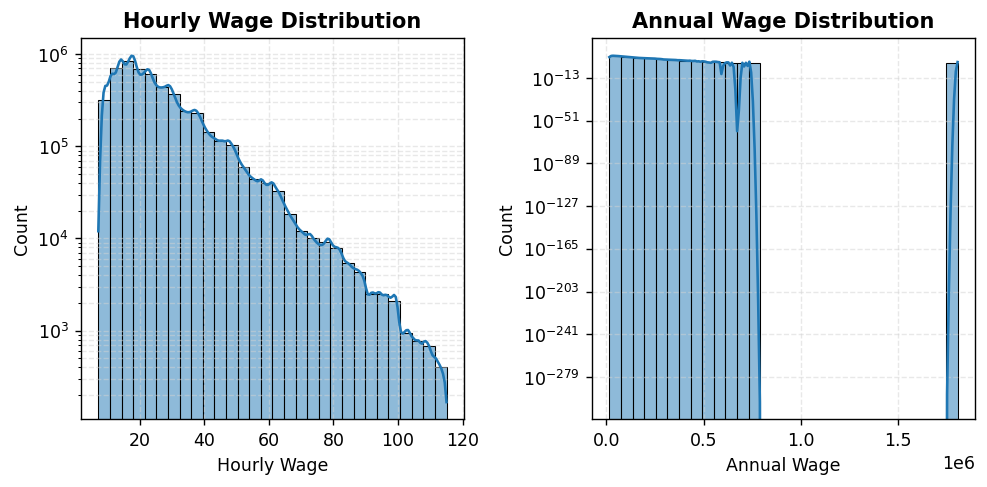

In [12]:
plt.subplots(1, 2, figsize=(8, 4), dpi=125)
plt.subplot(1, 2, 1)
sns.histplot(oes_all_df['hourly_wage_mean'].dropna(), kde=True, bins=30)
plt.title('Hourly Wage Distribution', fontweight='bold')
plt.xlabel('Hourly Wage')
plt.yscale('log')
plt.grid(True, which='both', ls='--', color='lightgrey', alpha=0.50)

plt.subplot(1, 2, 2)
sns.histplot(oes_all_df['annual_wage_mean'].dropna(), kde=True, bins=30)
plt.title('Annual Wage Distribution', fontweight='bold')
plt.xlabel('Annual Wage')
plt.yscale('log')
plt.grid(True, which='both', ls='--', color='lightgrey', alpha=0.50)

plt.tight_layout()
plt.show()

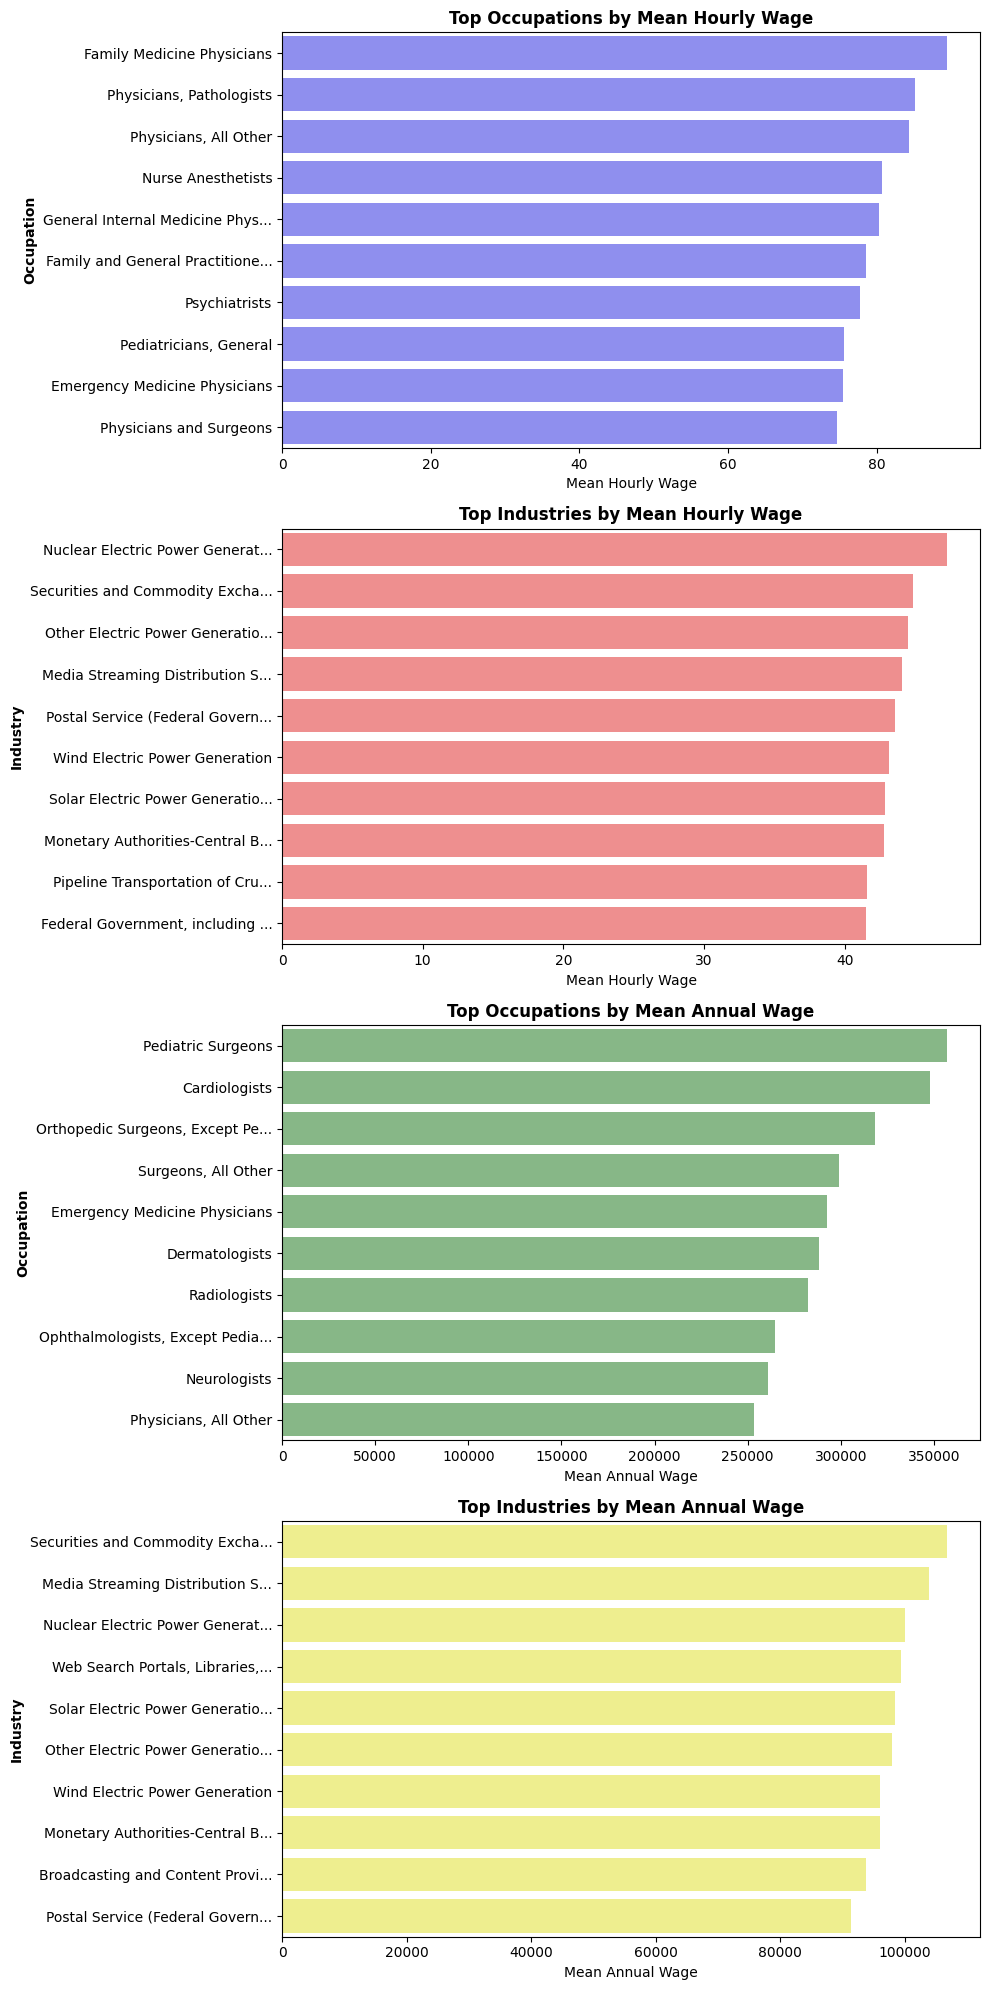

In [ ]:
# Median Wage by Occupation and Industry (Top 10)
by_occ = oes_all_df.groupby('occupation_soc_title')[['hourly_wage_mean', 'annual_wage_mean']].mean()
by_industry = oes_all_df.groupby('industry_naics_title')[['hourly_wage_mean', 'annual_wage_mean']].mean()

top10_occ_hourly = by_occ.sort_values(by='hourly_wage_mean', ascending=False).head(10)['hourly_wage_mean']
top10_industry_hourly = by_industry.sort_values(by='hourly_wage_mean', ascending=False).head(10)['hourly_wage_mean']

top10_occ_annual = by_occ.sort_values(by='annual_wage_mean', ascending=False).head(10)['annual_wage_mean']
top10_industry_annual = by_industry.sort_values(by='annual_wage_mean', ascending=False).head(10)['annual_wage_mean']


def top10_plot(x, y, title, xlabel, ylabel, color):
    def crop_text(text, max_length=30):
        if len(text) > max_length:
            return text[:max_length] + '...'
        return text

    sns.barplot(x=x, y=list(map(crop_text, y)), color=color, alpha=0.5)
    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel, fontweight='bold')


plt.subplots(4, 1, figsize=(10, 20))

# Plot Median Hourly Wage by Top 10 Occupations
plt.subplot(4, 1, 1)
top10_plot(
    x=top10_occ_hourly,
    y=top10_occ_hourly.index,
    title='Top Occupations by Mean Hourly Wage',
    xlabel='Mean Hourly Wage',
    ylabel='Occupation',
    color='blue',
)

plt.subplot(4, 1, 2)
top10_plot(
    x=top10_industry_hourly,
    y=top10_industry_hourly.index,
    title='Top Industries by Mean Hourly Wage',
    xlabel='Mean Hourly Wage',
    ylabel='Industry',
    color='red',
)

plt.subplot(4, 1, 3)
top10_plot(
    x=top10_occ_annual,
    y=top10_occ_annual.index,
    title='Top Occupations by Mean Annual Wage',
    xlabel='Mean Annual Wage',
    ylabel='Occupation',
    color='green',
)

plt.subplot(4, 1, 4)
top10_plot(
    x=top10_industry_annual,
    y=top10_industry_annual.index,
    title='Top Industries by Mean Annual Wage',
    xlabel='Mean Annual Wage',
    ylabel='Industry',
    color='yellow',
)

plt.tight_layout()
plt.show()

# **Milestone 2i - Data Exploration**

## **2.1 Data Fusion**

In [26]:
oes_all_df = pd.read_parquet(os.path.join(data_dir, processed_paths['oes']))
csc_all_df = pd.read_parquet(os.path.join(data_dir, processed_paths['csc']))
temperature_df = pd.read_parquet(os.path.join(data_dir, 'temperature.parquet'))
precipitation_df = pd.read_parquet(os.path.join(data_dir, 'precipitation.parquet'))
display(oes_all_df.head())
display(csc_all_df.head())
display(temperature_df.head())
display(precipitation_df.head())

,only_annual_wage,area_code,area_title,area_type,annual_wage_mean,annual_wage_median,annual_wage_10th_percentile,annual_wage_25th_percentile,annual_wage_75th_percentile,annual_wage_90th_percentile,...,location_quotent,wage_mean_prse,industry_naics_code,industry_naics_title,ownership_code,occupation_soc_code,occupation_soc_title,percentage_total,total_employment,year
0,NaN,99,U.S.,1,65470.0,48060.0,29050.0,35660.0,76980.0,121470.0,...,NaN,0.3,000000,Cross-industry,1235,00-0000,All Occupations,NaN,151853870.0,2023
1,NaN,99,U.S.,1,137750.0,116880.0,54550.0,78330.0,169090.0,231620.0,...,NaN,0.5,000000,Cross-industry,1235,11-0000,Management Occupations,NaN,10495770.0,2023
2,NaN,99,U.S.,1,136100.0,103460.0,46400.0,66170.0,165500.0,NaN,...,NaN,0.9,000000,Cross-industry,1235,11-1000,Top Executives,NaN,3751510.0,2023
3,NaN,99,U.S.,1,258900.0,206680.0,80000.0,130840.0,NaN,NaN,...,NaN,0.7,000000,Cross-industry,1235,11-1010,Chief Executives,NaN,211230.0,2023
4,NaN,99,U.S.,1,258900.0,206680.0,80000.0,130840.0,NaN,NaN,...,NaN,0.7,000000,Cross-industry,1235,11-1011,Chief Executives,NaN,211230.0,2023


,ST_FIPS,CIP01,CIP03,CIP04,CIP05,CIP09,CIP10,CIP11,CIP12,CIP13,...,CIP45,CIP46,CIP47,CIP48,CIP49,CIP50,CIP51,CIP52,CIP54,YEAR
0,1,354.1131,198.8820,122.0148,13.4127,1528.7283,97.4206,1493.5226,870.6495,1497.6931,...,1308.3078,312.6039,1545.1082,877.9717,398.5827,1067.7441,7658.1845,7317.4292,264.8665,2023
1,10,180.4231,90.1117,16.1320,11.3360,243.6923,43.7961,315.5129,200.9316,494.7888,...,502.1366,5.6699,140.4078,1.0460,80.0744,180.1054,1612.9231,1298.6040,51.5609,2023
2,11,0.0000,44.1120,68.5326,99.3007,483.2339,7.8819,395.6531,203.1032,95.1131,...,2216.2472,0.0000,0.0000,0.0000,0.0000,241.0454,1316.1248,1533.8932,117.7755,2023
3,12,1046.9547,736.7295,217.3663,83.2485,3865.1505,1359.2007,5473.5923,7019.7381,2388.6538,...,3952.7436,1371.2960,6014.8861,2238.2160,2049.0920,5224.7547,31915.6391,19650.6059,415.3792,2023
4,13,565.6590,258.6609,154.8656,129.6666,2594.2849,572.0287,4034.0345,2284.1847,3332.0602,...,2764.7516,405.7401,1700.6930,521.4358,533.2350,3343.0324,10114.6453,11867.3322,589.5630,2023


,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,FIPS_CODE
0,65.3,64.0,64.2,64.9,65.4,64.5,65.0,65.3,64.6,62.0,62.6,64.9,63.8,1
1,60.7,61.2,62.1,62.6,60.3,62.3,63.0,62.2,61.8,62.3,60.5,62.1,60.3,4
2,62.9,61.2,61.4,61.2,61.2,61.2,62.5,62.8,61.4,58.7,59.6,63.6,61.8,5
3,58.2,60.1,60.4,60.5,58.4,60.1,60.3,60.1,60.8,61.5,59.3,59.5,57.4,6
4,45.7,46.2,47.5,47.3,45.3,47.2,47.9,47.3,47.4,46.1,45.1,48.3,45.4,8


,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,FIPS_CODE
0,51.15,57.85,65.16,68.67,56.30,64.40,64.19,45.01,61.36,56.03,64.70,53.38,50.71,1
1,11.04,12.07,12.57,6.56,14.69,11.67,9.47,12.28,14.39,11.07,12.13,9.56,9.63,4
2,52.36,51.69,50.23,63.82,65.65,64.32,50.26,50.44,67.31,47.91,54.24,39.81,55.84,5
3,27.38,14.10,18.93,12.07,29.12,18.09,28.17,25.73,15.04,19.90,7.93,23.45,18.79,6
4,19.05,16.48,17.10,12.23,18.91,14.96,18.91,17.08,21.73,19.14,18.79,12.31,17.62,8


### **2.1.1 `only_annual_wage` and `only_hourly_wage` features (originally `ANNUAL` and `HOURLY`)** 

> **Description**
> - `only_annual_wage`: Contains "TRUE" if only annual wages are released. The OEWS program releases only annual wages for some occupations that typically work fewer than 2,080 hours per year, but are paid on an annual basis, such as teachers, pilots, and athletes.
> - `only_hourly_wage`: Contains "TRUE" if only hourly wages are released. The OEWS program releases only hourly wages for some occupations that typically work fewer than 2,080 hours per year and are paid on an hourly basis, such as actors, dancers, and musicians and singers.


- If `only_annual_wage = 1 (TRUE)`, then only annual wage is released => hourly wage is `NaN`
- If `only_hourly_wage = 1 (TRUE)`, then only hourly wage is released => annual wage is `NaN`

We can simply ignore these columns since the missingness can be inferred directly from the data.

In [29]:
display(oes_all_df[oes_all_df['only_hourly_wage'] == 1]['annual_wage_mean'].unique())
display(oes_all_df[oes_all_df['only_annual_wage'] == 1]['hourly_wage_mean'].unique())

array([nan])

array([nan])

### **2.1.2 Choosing valid states**


For this dataset, we would only consider state-level data and also the aggregated data for the entire US. For weather data, since we don't have records for Alaska and Hawaii, we would also omit these two states from the final dataset.

Therefore, the final dataset will be based on the following characteristics:
- **Geographical Information**: From 48 states and US-wide
- **Timeframe:** From 2011 to 2023
- **Job Market**: All valid jobs

In [32]:
valid_fips = (
    set(oes_all_df['area_code'].unique())
    & set(csc_all_df['ST_FIPS'].unique())
    & set(temperature_df['FIPS_CODE'].astype(str).unique())
    & set(precipitation_df['FIPS_CODE'].astype(str).unique())
)
print('Number of valid FIPS', len(valid_fips))

Number of valid FIPS 49


### **2.1.3 Combine all datasets**

We will then map the number of new graduates and weather (average temperature and precipitation) data into the final dataset.
- We will use the available crosswalk data from here to perform mapping: https://nces.ed.gov/ipeds/cip
- Since the field of study to occupation mapping is many to many, we would only consider the agggregate data from one major field of study to one major group of occupation. We can reasonable argue that the workforce is "potential" workforce and the number is descriptive to describe this workforce despite duplications

In [34]:
"""
Since accessing a dictionary is faster, so we organize the remaining dataframes (which are very small)
into dictionaries for easier data retrieval.
"""

year2fips2cip2degree = {}
year2fips2temperature = {}
year2fips2precipitation = {}

for _, row in csc_all_df.iterrows():
    row_dict = row.to_dict()

    year = row_dict['YEAR']
    fips = row_dict['ST_FIPS']

    cip2degree = {key[3:]: value for key, value in row_dict.items() if key.startswith('CIP')}

    if fips == 99:
        print(row)

    if year not in year2fips2cip2degree:
        year2fips2cip2degree[year] = {}
    if fips not in year2fips2cip2degree[year]:
        year2fips2cip2degree[year][fips] = {}

    year2fips2cip2degree[year][fips].update(cip2degree)

for _, row in temperature_df.iterrows():
    row_dict = row.to_dict()

    fips = str(int(row_dict['FIPS_CODE']))

    for key, value in row_dict.items():
        if key == 'FIPS_CODE':
            continue

        year = int(key)
        if year not in year2fips2temperature:
            year2fips2temperature[year] = {}
        if fips not in year2fips2temperature[year]:
            year2fips2temperature[year][fips] = {}

        year2fips2temperature[year][fips] = value

for _, row in precipitation_df.iterrows():
    row_dict = row.to_dict()

    fips = str(int(row_dict['FIPS_CODE']))

    for key, value in row_dict.items():
        if key == 'FIPS_CODE':
            continue

        year = int(key)
        if year not in year2fips2precipitation:
            year2fips2precipitation[year] = {}
        if fips not in year2fips2precipitation[year]:
            year2fips2precipitation[year][fips] = {}

        year2fips2precipitation[year][fips] = value

In [37]:
cip_soc_crosswalk_df = pd.read_excel(
    os.path.join(data_dir, raw_dir, 'cip2020_soc2018_crosswalk.xlsx'), sheet_name=1, dtype=str
)

soc_keys = cip_soc_crosswalk_df['SOC2018Code'].str[:2].unique()
soc_to_cip = {key: set() for key in soc_keys}

for _, row in cip_soc_crosswalk_df.iterrows():
    soc_to_cip[row['SOC2018Code'][:2]].add(row['CIP2020Code'][:2])

display(cip_soc_crosswalk_df)

,CIP2020Code,CIP2020Title,SOC2018Code,SOC2018Title
0,01.0000,"Agriculture, General.",19-1011,Animal Scientists
1,01.0000,"Agriculture, General.",19-1012,Food Scientists and Technologists
2,01.0000,"Agriculture, General.",19-1013,Soil and Plant Scientists
3,01.0000,"Agriculture, General.",19-4012,Agricultural Technicians
4,01.0000,"Agriculture, General.",25-1041,"Agricultural Sciences Teachers, Postsecondary"
...,...,...,...,...
6092,99.9999,NO MATCH,55-2012,First-Line Supervisors of Weapons Specialists/...
6093,99.9999,NO MATCH,55-2013,First-Line Supervisors of All Other Tactical O...
6094,99.9999,NO MATCH,55-3011,Air Crew Members
6095,99.9999,NO MATCH,55-3013,Armored Assault Vehicle Crew Members


In [ ]:
# Rename the columns for easier inspection

feature_column_names = {
    'area_code': 'feature.area_code',
    'area_title': 'feature.area_title',
    'industry_naics_code': 'feature.industry_naics_code',
    'industry_naics_title': 'feature.industry_naics_title',
    'occupation_soc_code': 'feature.occupation_soc_code',
    'occupation_soc_title': 'feature.occupation_soc_title',
    'total_employment': 'feature.total_employment',
    'percentage_total': 'feature.percentage_total',
    'year': 'feature.year',
}
label_column_names = {
    'hourly_wage_mean': 'label.hourly_wage_mean',
    'annual_wage_mean': 'label.annual_wage_mean',
}

merged_df = oes_all_df[oes_all_df['area_code'].isin(valid_fips)][
    list(feature_column_names.keys()) + list(label_column_names.keys())
]
merged_df = merged_df.rename(columns=feature_column_names)
merged_df = merged_df.rename(columns=label_column_names)


def get_college_degree(row):
    cips = soc_to_cip.get(row['feature.occupation_soc_code'][:2])
    if cips is None:
        return np.nan

    year = row['feature.year']
    fips = row['feature.area_code']

    num_degrees = 0
    for cip in cips:
        num_degrees += year2fips2cip2degree[year][fips].get(cip, 0)

    return num_degrees


def get_temperature(row):
    year, fips = row['feature.year'], row['feature.area_code']

    if fips not in valid_fips:
        return np.nan
    return year2fips2temperature[year][fips]


def get_precipitation(row):
    year, fips = row['feature.year'], row['feature.area_code']

    if fips not in valid_fips:
        return np.nan
    return year2fips2precipitation[year][fips]


merged_df['feature.new_college_degree'] = merged_df.progress_apply(get_college_degree, axis=1)
merged_df['feature.temperature'] = merged_df[['feature.year', 'feature.area_code']].progress_apply(
    get_temperature, axis=1
)
merged_df['feature.precipitation'] = merged_df[['feature.year', 'feature.area_code']].progress_apply(
    get_precipitation, axis=1
)


merged_df = merged_df.drop_duplicates()  # each entry should be unique in this form
merged_df = merged_df.reset_index(drop=True)

merged_df

Processing Dataframe:   0%|          | 0/2446483 [00:00<?, ?it/s]

Processing Dataframe:   0%|          | 0/2446483 [00:00<?, ?it/s]

Processing Dataframe:   0%|          | 0/2446483 [00:00<?, ?it/s]

,feature.area_code,feature.area_title,feature.industry_naics_code,feature.industry_naics_title,feature.occupation_soc_code,feature.occupation_soc_title,feature.total_employment,feature.percentage_total,feature.year,label.hourly_wage_mean,label.annual_wage_mean,feature.new_college_degree,feature.temperature,feature.precipitation
0,99,U.S.,000000,Cross-industry,00-0000,All Occupations,151853870.0,NaN,2023,23.11,65470.0,NaN,54.37,29.54
1,99,U.S.,000000,Cross-industry,11-0000,Management Occupations,10495770.0,NaN,2023,56.19,137750.0,2.167487e+06,54.37,29.54
2,99,U.S.,000000,Cross-industry,11-1000,Top Executives,3751510.0,NaN,2023,49.74,136100.0,2.167487e+06,54.37,29.54
3,99,U.S.,000000,Cross-industry,11-1010,Chief Executives,211230.0,NaN,2023,99.37,258900.0,2.167487e+06,54.37,29.54
4,99,U.S.,000000,Cross-industry,11-1011,Chief Executives,211230.0,NaN,2023,99.37,258900.0,2.167487e+06,54.37,29.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418335,56,Wyoming,000000,Cross-industry,53-7071,Gas Compressor and Gas Pumping Station Operators,180.0,NaN,2011,26.91,56330.0,8.054832e+02,41.10,18.55
2418336,56,Wyoming,000000,Cross-industry,53-7073,Wellhead Pumpers,480.0,NaN,2011,21.90,42920.0,8.054832e+02,41.10,18.55
2418337,56,Wyoming,000000,Cross-industry,53-7081,Refuse and Recyclable Material Collectors,280.0,NaN,2011,14.39,30830.0,8.054832e+02,41.10,18.55
2418338,56,Wyoming,000000,Cross-industry,53-7111,Mine Shuttle Car Operators,80.0,NaN,2011,28.57,59460.0,8.054832e+02,41.10,18.55


In [ ]:
merged_df.to_parquet(os.path.join(data_dir, processed_paths['merged']))

## **2.2 Basic Feature Analysis**

1. From **OES** data:
- `feature.area_code`: The code representing the area (FIPS code).
- `feature.area_title`: The name of the area.
- `feature.industry_naics_code`: The NAICS (North American Industry Classification System) code representing the industry.
- `feature.industry_naics_title`: The name of the industry corresponding to the NAICS code.
- `feature.occupation_soc_code`: The SOC (Standard Occupational Classification) code representing the occupation.
- `feature.occupation_soc_title`: The title of the occupation.
- `feature.total_employment`: The total number of employees in the occupation.
- `feature.percentage_total`: The percentage of total employees in the area.
- `feature.year`: The year the data was recorded.
2. Engineered Features:
- `feature.new_college_degree`: The number of college degrees awarded in related programs (CIP codes) for a given occupation.
- `feature.temperature`: The average annual temperature for the area and year.
- `feature.precipitation`: The total annual precipitation for the area and year.

Such features can also be grouped in the following categories:
* **Area and Location Data**: `feature.area_code`, `feature.area_title`
* **Industry Data**: `feature.industry_naics_code`, `feature.industry_naics_title`
* **Occupation Data**: `feature.occupation_soc_code`, `feature.occupation_soc_title`
* **Employment Data**: `feature.total_employees`, `feature.percentage_total`
* **Year Data**: `feature.year`
* **Environmental Data**: `feature.temperature`, `feature.precipitation`
* **Educational Data**: `feature.new_college_degree`

The team has the hypothesis that these are the most relevant features for predicting the `label.hourly_wage_mean` and `label.annual_wage_mean` of a person, and will test its hypothesis through extensive analysis in the next deliverables.

In [12]:
merged_df = pd.read_parquet(os.path.join(data_dir, processed_paths['merged']))
merged_df

,feature.area_code,feature.area_title,feature.industry_naics_code,feature.industry_naics_title,feature.occupation_soc_code,feature.occupation_soc_title,feature.total_employment,feature.percentage_total,feature.year,label.hourly_wage_mean,label.annual_wage_mean,feature.new_college_degree,feature.temperature,feature.precipitation
0,99,U.S.,000000,Cross-industry,00-0000,All Occupations,151853870.0,NaN,2023,23.11,65470.0,NaN,54.37,29.54
1,99,U.S.,000000,Cross-industry,11-0000,Management Occupations,10495770.0,NaN,2023,56.19,137750.0,2.167487e+06,54.37,29.54
2,99,U.S.,000000,Cross-industry,11-1000,Top Executives,3751510.0,NaN,2023,49.74,136100.0,2.167487e+06,54.37,29.54
3,99,U.S.,000000,Cross-industry,11-1010,Chief Executives,211230.0,NaN,2023,99.37,258900.0,2.167487e+06,54.37,29.54
4,99,U.S.,000000,Cross-industry,11-1011,Chief Executives,211230.0,NaN,2023,99.37,258900.0,2.167487e+06,54.37,29.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418335,56,Wyoming,000000,Cross-industry,53-7071,Gas Compressor and Gas Pumping Station Operators,180.0,NaN,2011,26.91,56330.0,8.054832e+02,41.10,18.55
2418336,56,Wyoming,000000,Cross-industry,53-7073,Wellhead Pumpers,480.0,NaN,2011,21.90,42920.0,8.054832e+02,41.10,18.55
2418337,56,Wyoming,000000,Cross-industry,53-7081,Refuse and Recyclable Material Collectors,280.0,NaN,2011,14.39,30830.0,8.054832e+02,41.10,18.55
2418338,56,Wyoming,000000,Cross-industry,53-7111,Mine Shuttle Car Operators,80.0,NaN,2011,28.57,59460.0,8.054832e+02,41.10,18.55


### **2.2.1 Wage Distribution**

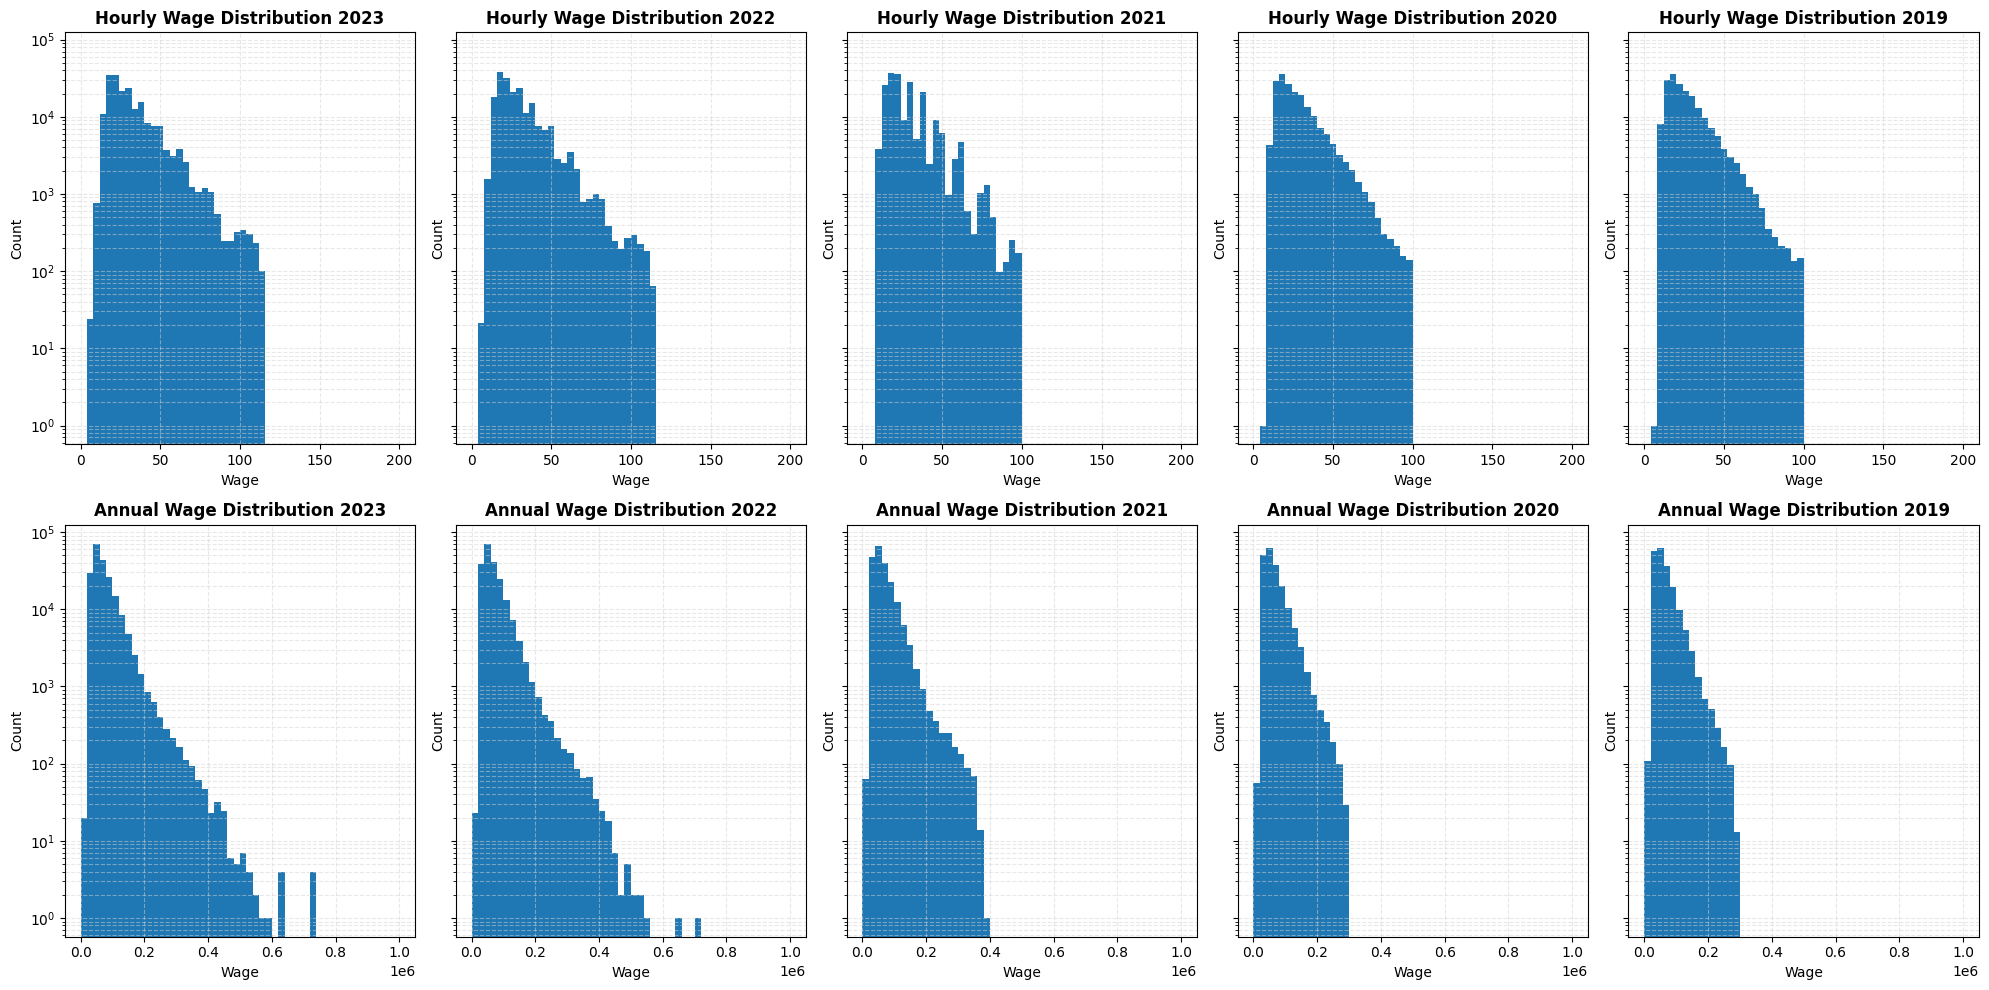

In [ ]:
num_sub_plots = (2, 5)
plt.subplots(*num_sub_plots, figsize=(20, 10), sharey=True)

for idx, year in enumerate(years[:5], start=1):
    subset_df = merged_df[merged_df['feature.year'] == year]

    # Hourly wage histogram
    plt.subplot(*num_sub_plots, idx)
    hist_data = subset_df['label.hourly_wage_mean'].dropna()
    plt.hist(hist_data, bins=50, range=(0, 200), log=True)

    plt.title(f'Hourly Wage Distribution {year}', fontweight='bold')
    plt.xlabel('Wage')
    plt.ylabel('Count')
    plt.grid(True, which='both', ls='--', color='lightgrey', alpha=0.50)

    # Annual wage histogram
    plt.subplot(*num_sub_plots, num_sub_plots[1] + idx)
    hist_data_annual = subset_df['label.annual_wage_mean'].dropna()
    plt.hist(hist_data_annual, bins=50, range=(0, 1e6), log=True)

    plt.title(f'Annual Wage Distribution {year}', fontweight='bold')
    plt.xlabel('Wage')
    plt.ylabel('Count')
    plt.grid(True, which='both', ls='--', color='lightgrey', alpha=0.50)

plt.tight_layout()
plt.show()

### **2.2.2 Top Occupations and Industries**

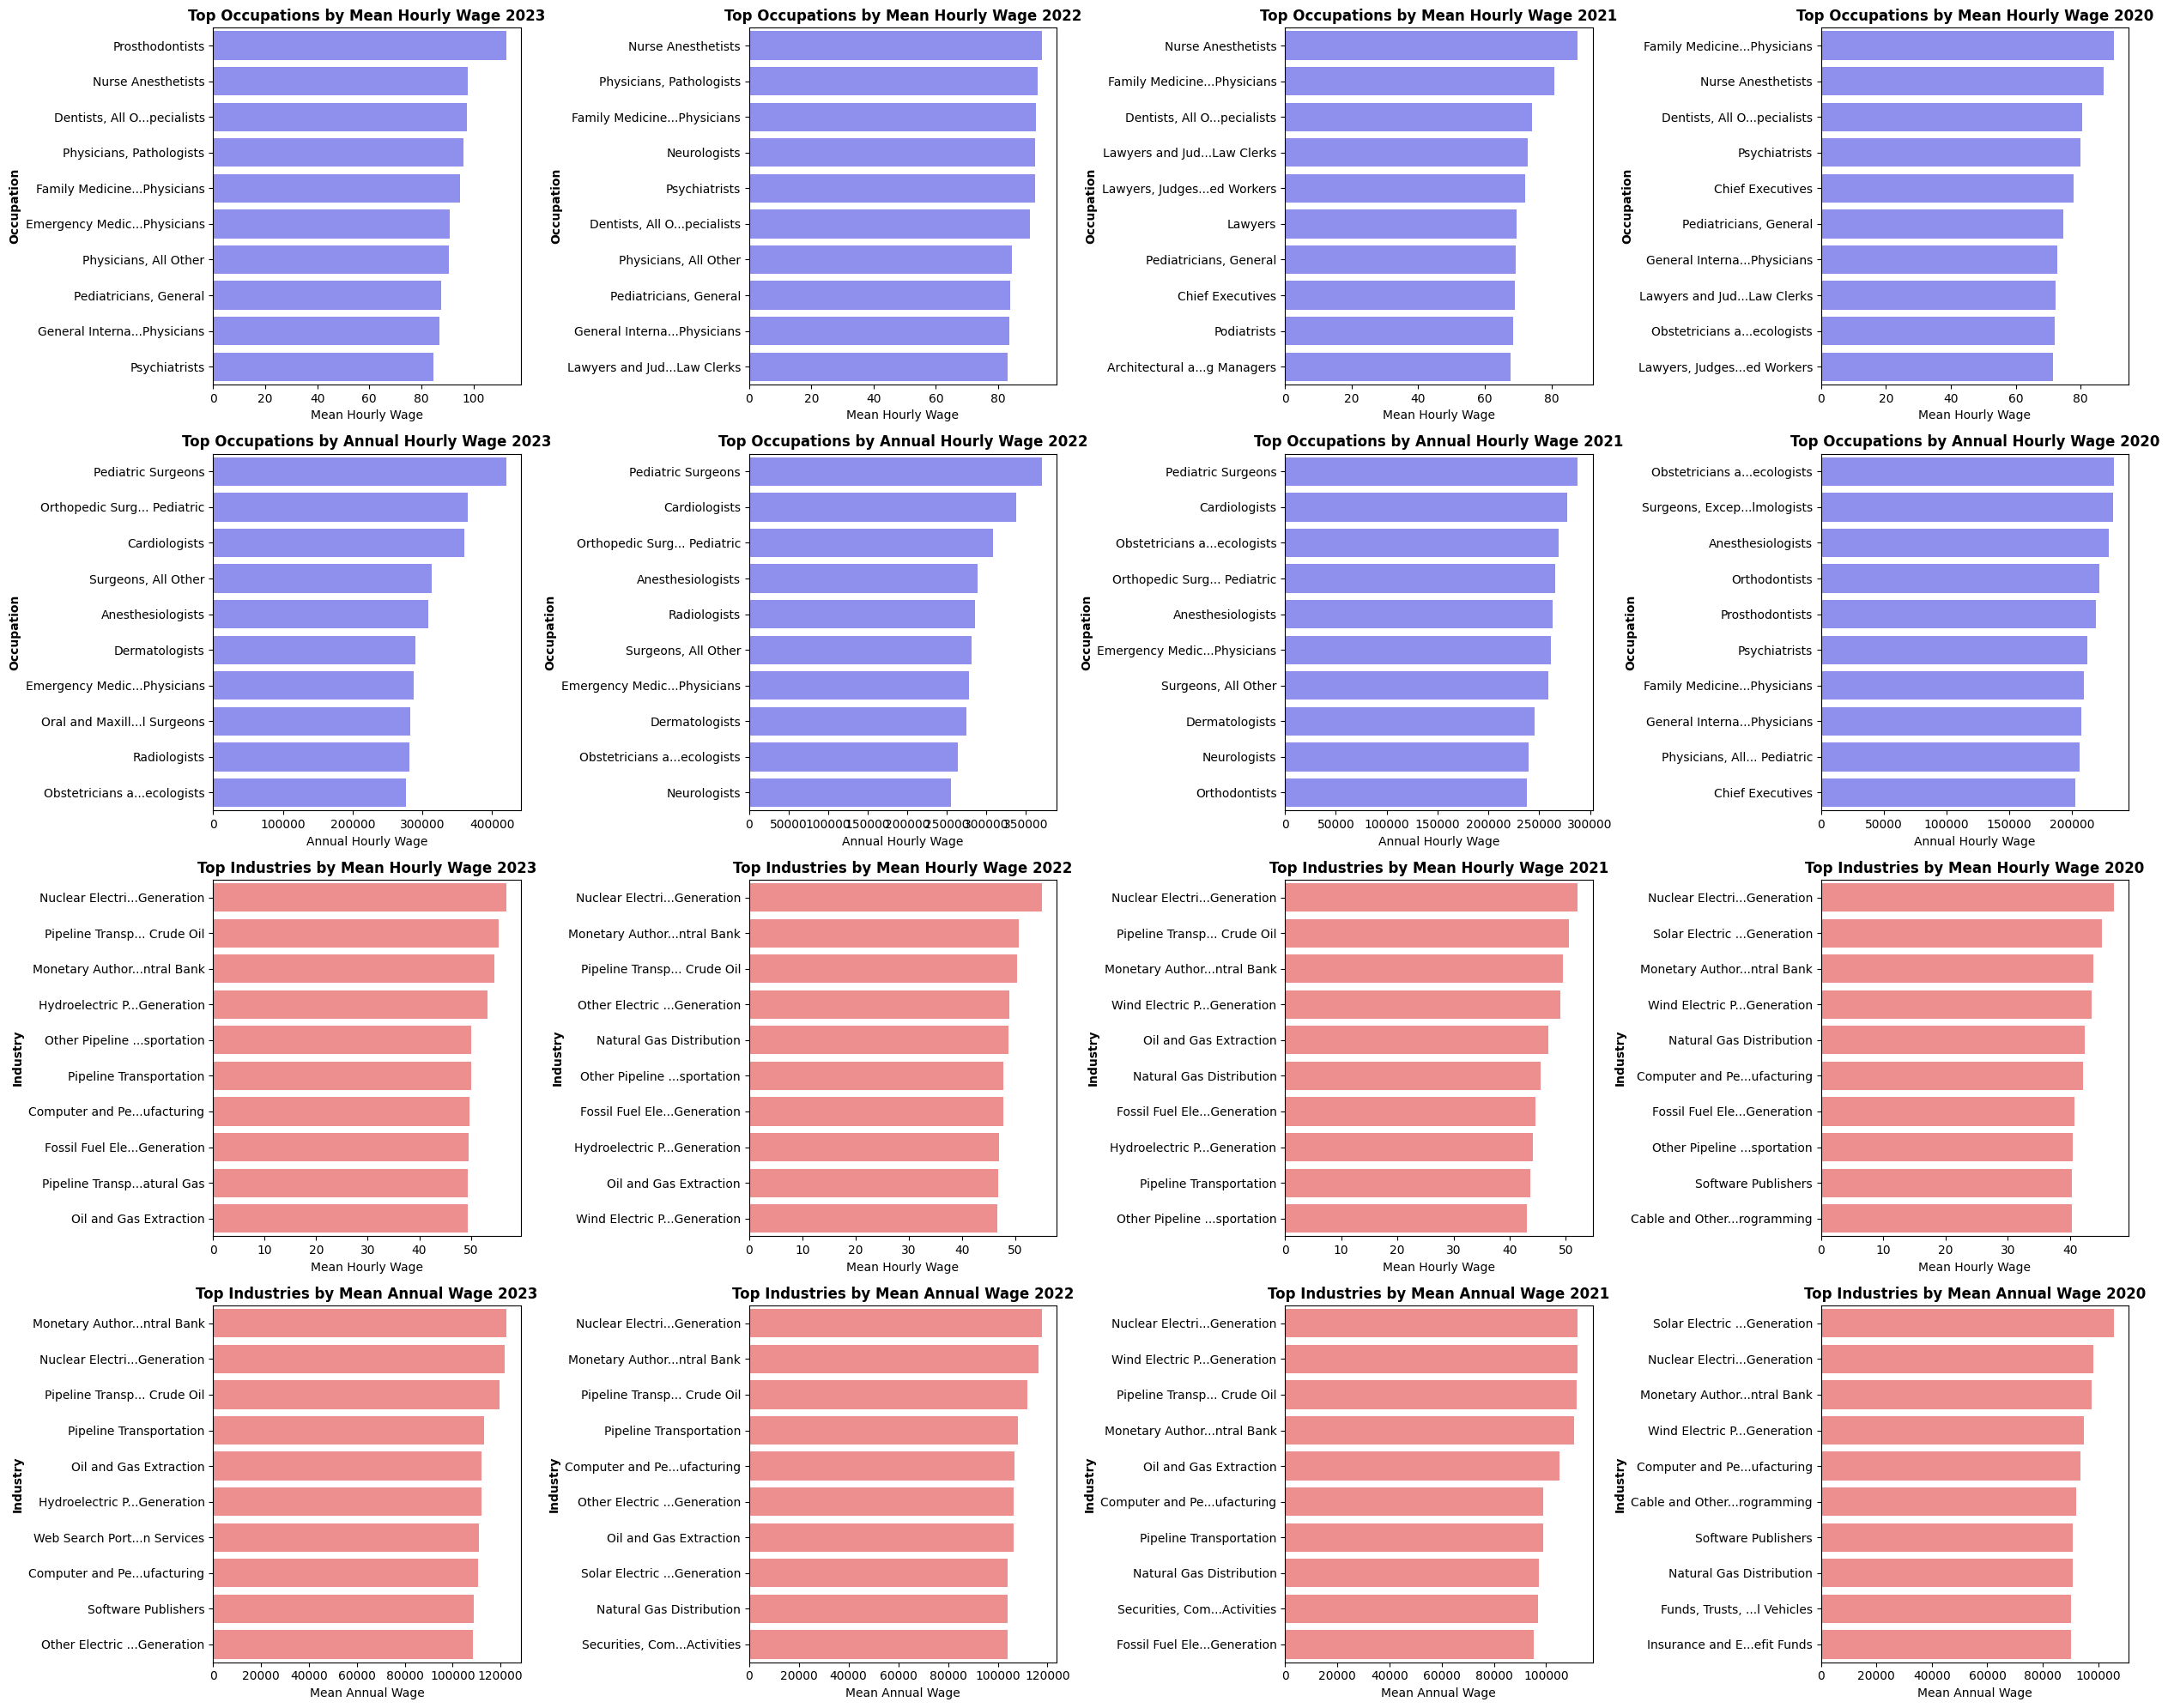

In [30]:
def top10_plot(x, y, title, xlabel, ylabel, color):
    def crop_text(text, max_length=25):
        if len(text) > max_length:
            return text[: max_length - 10] + '...' + text[-10:]
        return text

    sns.barplot(x=x, y=list(map(crop_text, y)), color=color, alpha=0.5)
    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel, fontweight='bold')


num_sub_plots = (4, 4)

plt.subplots(*num_sub_plots, figsize=(25, 20))


for idx, year in enumerate(years[:4], start=1):
    subset_df = merged_df[merged_df['feature.year'] == year]

    by_occ = subset_df.groupby('feature.occupation_soc_title')[
        ['label.hourly_wage_mean', 'label.annual_wage_mean']
    ].mean()
    by_industry = subset_df.groupby('feature.industry_naics_title')[
        ['label.hourly_wage_mean', 'label.annual_wage_mean']
    ].mean()

    top10_occ_hourly = by_occ.sort_values(by='label.hourly_wage_mean', ascending=False).head(10)[
        'label.hourly_wage_mean'
    ]
    top10_occ_annual = by_occ.sort_values(by='label.annual_wage_mean', ascending=False).head(10)[
        'label.annual_wage_mean'
    ]

    top10_industry_hourly = by_industry.sort_values(by='label.hourly_wage_mean', ascending=False).head(10)[
        'label.hourly_wage_mean'
    ]
    top10_industry_annual = by_industry.sort_values(by='label.annual_wage_mean', ascending=False).head(10)[
        'label.annual_wage_mean'
    ]

    # Occupations
    plt.subplot(*num_sub_plots, num_sub_plots[1] * 0 + idx)
    top10_plot(
        x=top10_occ_hourly,
        y=top10_occ_hourly.index,
        title=f'Top Occupations by Mean Hourly Wage {year}',
        xlabel='Mean Hourly Wage',
        ylabel='Occupation',
        color='blue',
    )
    plt.subplot(*num_sub_plots, num_sub_plots[1] * 1 + idx)
    top10_plot(
        x=top10_occ_annual,
        y=top10_occ_annual.index,
        title=f'Top Occupations by Annual Hourly Wage {year}',
        xlabel='Annual Hourly Wage',
        ylabel='Occupation',
        color='blue',
    )

    plt.subplot(*num_sub_plots, num_sub_plots[1] * 2 + idx)
    top10_plot(
        x=top10_industry_hourly,
        y=top10_industry_hourly.index,
        title=f'Top Industries by Mean Hourly Wage {year}',
        xlabel='Mean Hourly Wage',
        ylabel='Industry',
        color='red',
    )
    plt.subplot(*num_sub_plots, num_sub_plots[1] * 3 + idx)
    top10_plot(
        x=top10_industry_annual,
        y=top10_industry_annual.index,
        title=f'Top Industries by Mean Annual Wage {year}',
        xlabel='Mean Annual Wage',
        ylabel='Industry',
        color='red',
    )

plt.tight_layout()
plt.show()

In [32]:
merged_df[['label.hourly_wage_mean', 'label.annual_wage_mean']].describe()

,label.hourly_wage_mean,label.annual_wage_mean
count,2.312881e+06,2.382794e+06
mean,2.651997e+01,6.010820e+04
std,1.378933e+01,3.336423e+04
min,7.250000e+00,1.637000e+04
25%,1.677000e+01,3.719000e+04
50%,2.286000e+01,5.115000e+04
75%,3.251000e+01,7.326000e+04
max,1.149600e+02,7.350200e+05


### **2.2.3 NaNs Data Analysis**

The five columns that have missing values are:
- `feature.total_employees`
- `feature.percentage_total`
- `feature.new_college_degree`
- `label.hourly_wage_mean`
- `label.annual_wage_mean`

For now we will not drop the label as we will try to figure out how to deal with missing labels later.

In [33]:
merged_df.isna().sum(axis=0)

feature.area_code                    0
feature.area_title                   0
feature.industry_naics_code          0
feature.industry_naics_title         0
feature.occupation_soc_code          0
feature.occupation_soc_title         0
feature.total_employment        121699
feature.percentage_total        598982
feature.year                         0
label.hourly_wage_mean          105459
label.annual_wage_mean           35546
feature.new_college_degree        6185
feature.temperature                  0
feature.precipitation                0
dtype: int64

For `new_college_degree`, the generic category of `All occupations` does not have the required data

In [35]:
display(merged_df[merged_df['feature.new_college_degree'].isna()])
display(merged_df[merged_df['feature.new_college_degree'].isna()]['feature.occupation_soc_code'].value_counts())

,feature.area_code,feature.area_title,feature.industry_naics_code,feature.industry_naics_title,feature.occupation_soc_code,feature.occupation_soc_title,feature.total_employment,feature.percentage_total,feature.year,label.hourly_wage_mean,label.annual_wage_mean,feature.new_college_degree,feature.temperature,feature.precipitation
0,99,U.S.,000000,Cross-industry,00-0000,All Occupations,151853870.0,NaN,2023,23.11,65470.0,NaN,54.37,29.54
1396,99,U.S.,000001,"Cross-industry, Private Ownership only",00-0000,All Occupations,130039030.0,NaN,2023,22.40,64680.0,NaN,54.37,29.54
2770,99,U.S.,11,"Agriculture, Forestry, Fishing and Hunting",00-0000,All Occupations,413580.0,100.0,2023,17.14,43010.0,NaN,54.37,29.54
3103,99,U.S.,21,"Mining, Quarrying, and Oil and Gas Extraction",00-0000,All Occupations,571160.0,100.0,2023,29.71,77020.0,NaN,54.37,29.54
3617,99,U.S.,22,Utilities,00-0000,All Occupations,564750.0,100.0,2023,45.93,97250.0,NaN,54.37,29.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414846,51,Virginia,000000,Cross-industry,00-0000,All Occupations,3553360.0,NaN,2011,17.45,48870.0,NaN,57.00,48.30
2415622,53,Washington,000000,Cross-industry,00-0000,All Occupations,2720660.0,NaN,2011,19.30,50280.0,NaN,45.50,43.82
2416387,54,West Virginia,000000,Cross-industry,00-0000,All Occupations,700250.0,NaN,2011,13.46,36220.0,NaN,53.50,55.10
2417047,55,Wisconsin,000000,Cross-industry,00-0000,All Occupations,2645180.0,NaN,2011,16.04,41420.0,NaN,44.10,31.04


feature.occupation_soc_code
00-0000    6185
Name: count, dtype: int64

Most of the empty rows of `total_employees` are from the aggreegated US area (code 99).

In [38]:
display(merged_df[merged_df['feature.total_employment'].isna()])
display(merged_df[merged_df['feature.total_employment'].isna()]['feature.area_code'].value_counts())

,feature.area_code,feature.area_title,feature.industry_naics_code,feature.industry_naics_title,feature.occupation_soc_code,feature.occupation_soc_title,feature.total_employment,feature.percentage_total,feature.year,label.hourly_wage_mean,label.annual_wage_mean,feature.new_college_degree,feature.temperature,feature.precipitation
1568,99,U.S.,000001,"Cross-industry, Private Ownership only",17-2020,Agricultural Engineers,NaN,NaN,2023,42.67,94620.0,974763.3896,54.37,29.54
1569,99,U.S.,000001,"Cross-industry, Private Ownership only",17-2021,Agricultural Engineers,NaN,NaN,2023,42.67,94620.0,974763.3896,54.37,29.54
1592,99,U.S.,000001,"Cross-industry, Private Ownership only",17-2150,"Mining and Geological Engineers, Including Min...",NaN,NaN,2023,48.08,103980.0,974763.3896,54.37,29.54
1593,99,U.S.,000001,"Cross-industry, Private Ownership only",17-2151,"Mining and Geological Engineers, Including Min...",NaN,NaN,2023,48.08,103980.0,974763.3896,54.37,29.54
1596,99,U.S.,000001,"Cross-industry, Private Ownership only",17-2170,Petroleum Engineers,NaN,NaN,2023,65.42,149160.0,974763.3896,54.37,29.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418249,56,Wyoming,000000,Cross-industry,49-3091,Bicycle Repairers,NaN,NaN,2011,12.58,27260.0,2377.4151,41.10,18.55
2418260,56,Wyoming,000000,Cross-industry,49-9062,Medical Equipment Repairers,NaN,NaN,2011,19.19,38960.0,2377.4151,41.10,18.55
2418276,56,Wyoming,000000,Cross-industry,51-3093,Food Cooking Machine Operators and Tenders,NaN,NaN,2011,9.99,21990.0,3330.9218,41.10,18.55
2418287,56,Wyoming,000000,Cross-industry,51-6099,"Textile, Apparel, and Furnishings Workers, All...",NaN,NaN,2011,11.35,28000.0,3330.9218,41.10,18.55


feature.area_code
99    107634
44       488
4        411
51       399
32       390
9        388
10       381
50       377
8        376
24       366
29       358
34       342
27       336
17       335
30       334
16       329
40       319
49       318
54       313
20       312
35       309
21       299
31       296
26       294
38       294
25       292
23       291
55       285
22       283
28       283
41       282
13       280
47       272
12       266
53       262
1        250
33       243
5        239
19       234
18       232
39       230
45       224
36       211
48       194
42       187
6        186
37       170
46       168
56       137
Name: count, dtype: int64

Most of the missing `percetage_total` rows are from the general 00 area of `industry_naics_code`

In [40]:
display(merged_df[merged_df['feature.percentage_total'].isna()])
display(merged_df[merged_df['feature.percentage_total'].isna()]['feature.industry_naics_code'].str[:2].value_counts())

,feature.area_code,feature.area_title,feature.industry_naics_code,feature.industry_naics_title,feature.occupation_soc_code,feature.occupation_soc_title,feature.total_employment,feature.percentage_total,feature.year,label.hourly_wage_mean,label.annual_wage_mean,feature.new_college_degree,feature.temperature,feature.precipitation
0,99,U.S.,000000,Cross-industry,00-0000,All Occupations,151853870.0,NaN,2023,23.11,65470.0,NaN,54.37,29.54
1,99,U.S.,000000,Cross-industry,11-0000,Management Occupations,10495770.0,NaN,2023,56.19,137750.0,2.167487e+06,54.37,29.54
2,99,U.S.,000000,Cross-industry,11-1000,Top Executives,3751510.0,NaN,2023,49.74,136100.0,2.167487e+06,54.37,29.54
3,99,U.S.,000000,Cross-industry,11-1010,Chief Executives,211230.0,NaN,2023,99.37,258900.0,2.167487e+06,54.37,29.54
4,99,U.S.,000000,Cross-industry,11-1011,Chief Executives,211230.0,NaN,2023,99.37,258900.0,2.167487e+06,54.37,29.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418335,56,Wyoming,000000,Cross-industry,53-7071,Gas Compressor and Gas Pumping Station Operators,180.0,NaN,2011,26.91,56330.0,8.054832e+02,41.10,18.55
2418336,56,Wyoming,000000,Cross-industry,53-7073,Wellhead Pumpers,480.0,NaN,2011,21.90,42920.0,8.054832e+02,41.10,18.55
2418337,56,Wyoming,000000,Cross-industry,53-7081,Refuse and Recyclable Material Collectors,280.0,NaN,2011,14.39,30830.0,8.054832e+02,41.10,18.55
2418338,56,Wyoming,000000,Cross-industry,53-7111,Mine Shuttle Car Operators,80.0,NaN,2011,28.57,59460.0,8.054832e+02,41.10,18.55


feature.industry_naics_code
00    445697
99     47245
62     10027
56     10006
44      7488
81      7336
54      7303
23      7015
42      6723
33      6597
61      5542
48      5009
71      4936
52      3850
45      3773
53      3131
51      2803
31      2755
72      2648
32      2492
55      1820
21      1777
22      1200
11       907
49       902
Name: count, dtype: int64

However, we cannot drop all these columns since we will left with only data for the US area. We will deal with this later.

In [42]:
merged_df.dropna(subset=['feature.total_employment', 'feature.percentage_total', 'feature.new_college_degree'])[
    'feature.area_code'
].value_counts()

feature.area_code
99    1813824
Name: count, dtype: int64

# **Milestone 2ii - Baseline Learning**

In [8]:
merged_df = pd.read_parquet(os.path.join(data_dir, processed_paths['merged']))
label_columns = [column for column in merged_df.columns if column.startswith('label')]
numeric_columns = [
    column
    for column in merged_df.columns
    if column.startswith('feature') and pd.api.types.is_numeric_dtype(merged_df[column])
]
categorical_columns = [
    column
    for column in merged_df.columns
    if column.startswith('feature') and 'title' not in column and pd.api.types.is_string_dtype(merged_df[column])
]  # since code and titles represent similar quantity, we can drop one of two
label_columns, numeric_columns, categorical_columns

(['label.hourly_wage_mean', 'label.annual_wage_mean'],
 ['feature.total_employment',
  'feature.percentage_total',
  'feature.year',
  'feature.new_college_degree',
  'feature.temperature',
  'feature.precipitation'],
 ['feature.area_code',
  'feature.industry_naics_code',
  'feature.occupation_soc_code'])

In [18]:
isna_df = merged_df[label_columns + numeric_columns + categorical_columns].isna().sum(axis=0)
nan_columns = list(isna_df[isna_df != 0].index)
isna_df, nan_columns

(label.hourly_wage_mean         105459
 label.annual_wage_mean          35546
 feature.total_employment       121699
 feature.percentage_total       598982
 feature.year                        0
 feature.new_college_degree       6185
 feature.temperature                 0
 feature.precipitation               0
 feature.area_code                   0
 feature.industry_naics_code         0
 feature.occupation_soc_code         0
 dtype: int64,
 ['label.hourly_wage_mean',
  'label.annual_wage_mean',
  'feature.total_employment',
  'feature.percentage_total',
  'feature.new_college_degree'])

In [ ]:
data = merged_df.copy()
imputer = skl_impute.SimpleImputer()
data[nan_columns] = imputer.fit_transform(data[nan_columns])

data_train = data.sample(n=10000, random_state=0)
data_test = data.sample(n=1000, random_state=0)

X_train_raw = data_train[numeric_columns + categorical_columns]
y_train_raw = data_train[label_columns]
X_test_raw = data_test[numeric_columns + categorical_columns]
y_test_raw = data_test[label_columns]

## **2.1 Baseline with all features**

Trained the Linear regression model with all the features to obtain a baseline performance. Then trained the model by removing one feature at a time to evaluate feature importance. 

In [63]:
def preprocess(X, y, encoder=None, X_scaler=None, y_scaler=None):
    if encoder is None:
        encoder = skl_preprocessing.OneHotEncoder(sparse_output=False)
        encoder.fit(X[categorical_columns])

    X_categorical_data = encoder.transform(X[categorical_columns])
    X_numeric_data = X[numeric_columns].values

    X_new_data = ei.pack([X_categorical_data, X_numeric_data], 'b *')[0]

    if X_scaler is None:
        X_scaler = skl_preprocessing.StandardScaler()
        X_scaler.fit(X_new_data)
    if y_scaler is None:
        y_scaler = skl_preprocessing.StandardScaler()
        y_scaler.fit(y)
    X_data = X_scaler.transform(X_new_data)
    y_data = y_scaler.transform(y)
    X_final = pd.DataFrame(X_data, columns=list(encoder.get_feature_names_out()) + numeric_columns)
    y_final = pd.DataFrame(y_data, columns=label_columns)
    return X_final, y_final, encoder, X_scaler, y_scaler


X_train_0, y_train_0, encoder_0, X_scaler_0, y_scaler_0 = preprocess(X_train_raw, y_train_raw)
X_test_0, y_test_0, *_ = preprocess(X_test_raw, y_test_raw, encoder_0, X_scaler_0, y_scaler_0)

In [66]:
linear_model_0 = skl_linear_model.LinearRegression()
linear_model_0.fit(X_train_0, y_train_0)
y_pred_0 = pd.DataFrame(linear_model_0.predict(X_test_0), columns=label_columns)

In [76]:
def compute_metrics(y_pred, y_test):
    y_pred_hourly, y_test_hourly = (
        y_pred['label.hourly_wage_mean'],
        y_test['label.hourly_wage_mean'],
    )
    y_pred_annual, y_test_annual = (
        y_pred['label.annual_wage_mean'],
        y_test['label.annual_wage_mean'],
    )

    mse_hourly = skl_metrics.mean_squared_error(y_test_hourly, y_pred_hourly)
    mae_hourly = skl_metrics.mean_absolute_error(y_test_hourly, y_pred_hourly)
    r2_hourly = skl_metrics.r2_score(y_test_hourly, y_pred_hourly)

    mse_annual = skl_metrics.mean_squared_error(y_test_annual, y_pred_annual)
    mae_annual = skl_metrics.mean_absolute_error(y_test_annual, y_pred_annual)
    r2_annual = skl_metrics.r2_score(y_test_annual, y_pred_annual)

    return mse_hourly, mae_hourly, r2_hourly, mse_annual, mae_annual, r2_annual


mse_hourly_0, mae_hourly_0, r2_hourly_0, mse_annual_0, mae_annual_0, r2_annual_0 = compute_metrics(y_pred_0, y_test_0)

print('Hourly Wage - MSE:', mse_hourly_0, 'MAE:', mae_hourly_0, 'R2:', r2_hourly_0)
print('Annual Wage - MSE:', mse_annual_0, 'MAE:', mae_annual_0, 'R2:', r2_annual_0)

Hourly Wage - MSE: 0.15409880049528651 MAE: 0.24626337908511178 R2: 0.8486839865374526
Annual Wage - MSE: 0.1491371686692333 MAE: 0.2217657397113844 R2: 0.8707104911132784


## **2.2 Numerical only**

In [77]:
X_train_1, y_train_1 = X_train_0[numeric_columns], y_train_0
X_test_1, y_test_1 = X_test_0[numeric_columns], y_test_0

linear_model_1 = skl_linear_model.LinearRegression()
linear_model_1.fit(X_train_1, y_train_1)
y_pred_1 = pd.DataFrame(linear_model_1.predict(X_test_1), columns=label_columns)

mse_hourly_1, mae_hourly_1, r2_hourly_1, mse_annual_1, mae_annual_1, r2_annual_1 = compute_metrics(y_pred_1, y_test_1)

print('Hourly Wage - MSE:', mse_hourly_1, 'MAE:', mae_hourly_1, 'R2:', r2_hourly_1)
print('Annual Wage - MSE:', mse_annual_1, 'MAE:', mae_annual_1, 'R2:', r2_annual_1)

Hourly Wage - MSE: 0.8988534546540285 MAE: 0.7032496196372497 R2: 0.11737845454905771
Annual Wage - MSE: 1.0390758190282938 MAE: 0.6955415797727573 R2: 0.09920777270360881


## **2.3 Categorical only**

In [78]:
X_train_2, y_train_2 = X_train_0[encoder_0.get_feature_names_out()], y_train_0
X_test_2, y_test_2 = X_test_0[encoder_0.get_feature_names_out()], y_test_0

linear_model_2 = skl_linear_model.LinearRegression()
linear_model_2.fit(X_train_2, y_train_2)
y_pred_2 = pd.DataFrame(linear_model_2.predict(X_test_2), columns=label_columns)

mse_hourly_2, mae_hourly_2, r2_hourly_2, mse_annual_2, mae_annual_2, r2_annual_2 = compute_metrics(y_pred_2, y_test_2)

print('Hourly Wage - MSE:', mse_hourly_2, 'MAE:', mae_hourly_2, 'R2:', r2_hourly_2)
print('Annual Wage - MSE:', mse_annual_2, 'MAE:', mae_annual_2, 'R2:', r2_annual_2)

Hourly Wage - MSE: 0.17288193979435953 MAE: 0.2719112226817948 R2: 0.830240041809055
Annual Wage - MSE: 0.16691976023512103 MAE: 0.24729875806758025 R2: 0.8552944647075076


## **2.2 Remove each feature**

In [ ]:
X_train_0.isna().sum()

In [92]:
X_train_0.isna().sum().sum()

np.int64(0)

In [ ]:
mse_results = {'hourly': [], 'annual': []}
mae_results = {'hourly': [], 'annual': []}
r2_results = {'hourly': [], 'annual': []}

for column in tqdm(categorical_columns + numeric_columns):
    if column in categorical_columns:
        selected_columns = [c for c in X_train_0.columns if column not in c]
    elif column in numeric_columns:
        selected_columns = list(X_train_0.columns)
        selected_columns.remove(column)
    else:
        raise Exception

    X_train_3, y_train_3 = X_train_0[selected_columns], y_train_0
    X_test_3, y_test_3 = X_test_0[selected_columns], y_test_0

    try:
        linear_model_3 = skl_linear_model.LinearRegression()
        linear_model_3.fit(X_train_3, y_train_3)
    except Exception:
        print('Failed to use Linear Regression, retrying')
        linear_model_3 = skl_linear_model.Ridge(alpha=0)  # essentially the same
        linear_model_3.fit(X_train_3, y_train_3)

    y_pred_3 = pd.DataFrame(linear_model_3.predict(X_test_3), columns=label_columns)

    mse_hourly_3, mae_hourly_3, r2_hourly_3, mse_annual_3, mae_annual_3, r2_annual_3 = compute_metrics(
        y_pred_3, y_test_3
    )
    mse_results['hourly'].append(mse_hourly_3)
    mse_results['annual'].append(mse_annual_3)
    mae_results['hourly'].append(mae_hourly_3)
    mae_results['annual'].append(mae_annual_3)
    r2_results['hourly'].append(r2_hourly_3)
    r2_results['annual'].append(r2_annual_3)

  0%|          | 0/9 [00:00<?, ?it/s]

Failed to use Linear Regression, retrying
Failed to use Linear Regression, retrying


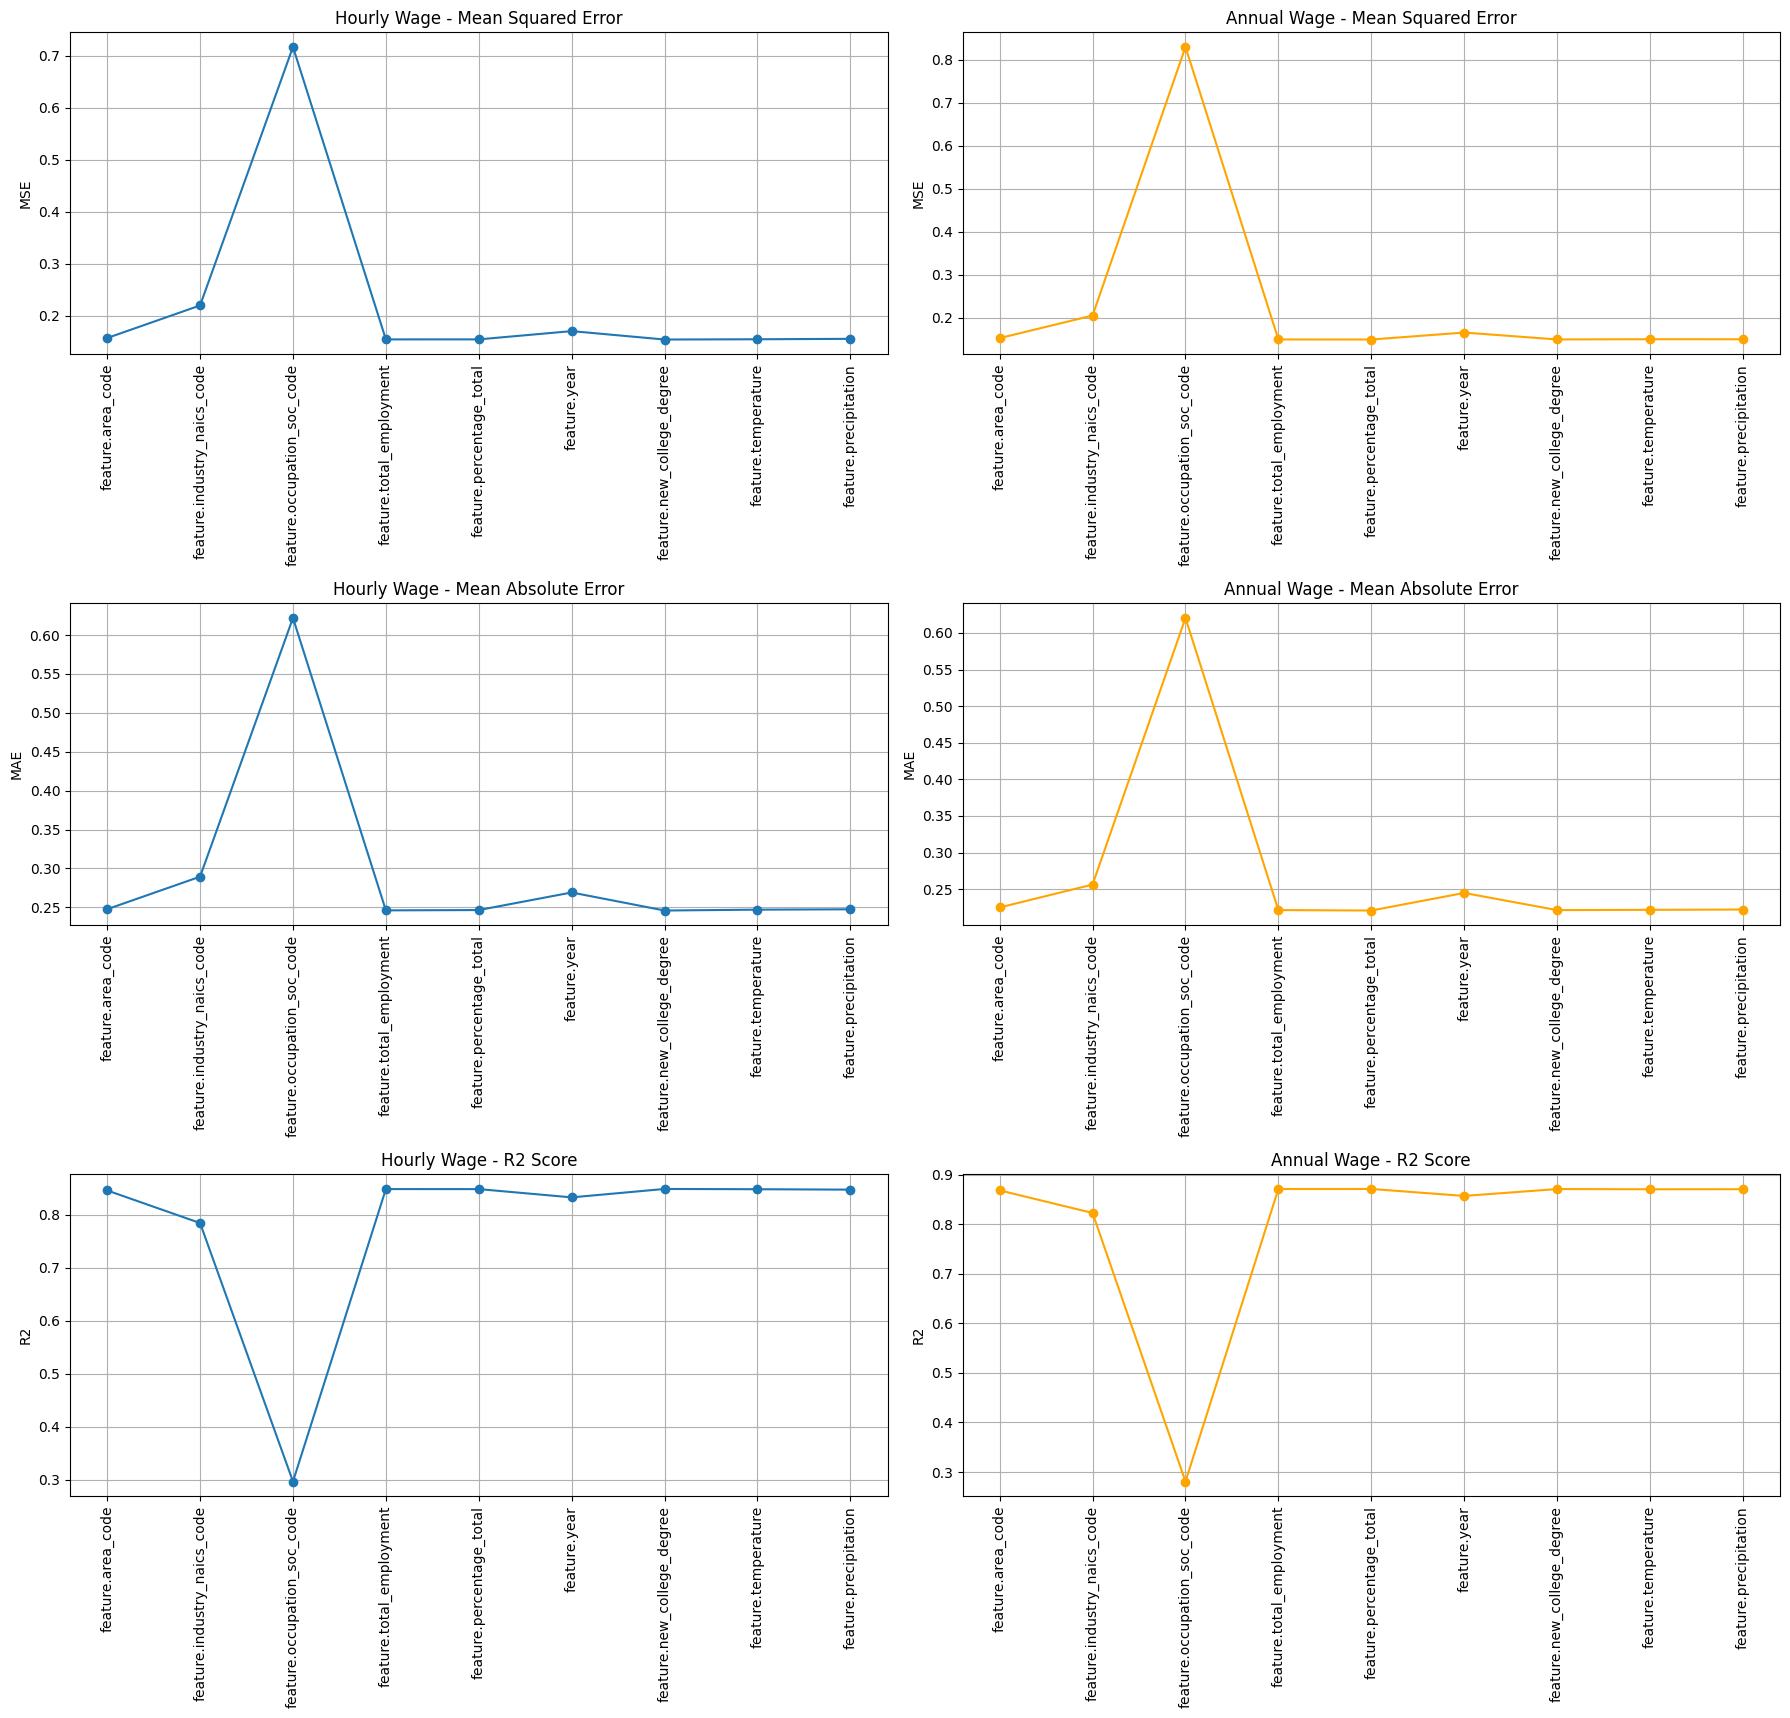

In [ ]:
# plotting Annual and Hourly wage metrics
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
features = categorical_columns + numeric_columns

# Hourly Wage Metrics
# MSE Plot for Hourly Wage
axes[0, 0].plot(features, mse_results['hourly'], label='Hourly Wage MSE', marker='o')
axes[0, 0].set_title('Hourly Wage - Mean Squared Error')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].grid(True)
axes[0, 0].tick_params(axis='x', rotation=90)

# MAE Plot for Hourly Wage
axes[1, 0].plot(features, mae_results['hourly'], label='Hourly Wage MAE', marker='o')
axes[1, 0].set_title('Hourly Wage - Mean Absolute Error')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].grid(True)
axes[1, 0].tick_params(axis='x', rotation=90)

# R2 Plot for Hourly Wage
axes[2, 0].plot(features, r2_results['hourly'], label='Hourly Wage R2', marker='o')
axes[2, 0].set_title('Hourly Wage - R2 Score')
axes[2, 0].set_ylabel('R2')
axes[2, 0].grid(True)
axes[2, 0].tick_params(axis='x', rotation=90)

# Annual Wage Metrics
# MSE Plot for Annual Wage
axes[0, 1].plot(features, mse_results['annual'], label='Annual Wage MSE', marker='o', color='orange')
axes[0, 1].set_title('Annual Wage - Mean Squared Error')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].grid(True)
axes[0, 1].tick_params(axis='x', rotation=90)

# MAE Plot for Annual Wage
axes[1, 1].plot(features, mae_results['annual'], label='Annual Wage MAE', marker='o', color='orange')
axes[1, 1].set_title('Annual Wage - Mean Absolute Error')
axes[1, 1].set_ylabel('MAE')
axes[1, 1].grid(True)
axes[1, 1].tick_params(axis='x', rotation=90)

# R2 Plot for Annual Wage
axes[2, 1].plot(features, r2_results['annual'], label='Annual Wage R2', marker='o', color='orange')
axes[2, 1].set_title('Annual Wage - R2 Score')
axes[2, 1].set_ylabel('R2')
axes[2, 1].grid(True)
axes[2, 1].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.show()

# **Milestone 3 - Deep Learning**

# **Milestone 4 - Feature Importance**